In [163]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [164]:
df = pd.read_excel('aspiring_minds_employability_outcomes_2015.xlsx')

In [323]:
df_dummy = pd.read_excel('aspiring_minds_employability_outcomes_2015.xlsx')

<b>Description:</b>
The data is about a set of engineering students who apply for jobs through AMCAT score, it also contains profile discrpiton of those students. The target variables are Salary, Job Title, and Job Location. The standardized scores for cognitive skills, technical skills, and personality skills are derived from a few of the different 40 independent variables.


<b>Objective</b>
The objective of this analysis is to identify the impact of differnt parameters of the candidate that influence the salary of each employee and variation in job titles and job location placement for different engineering branches and tier of the college and other parameters/scores.

In [166]:
df.head()

Unnamed: 0      ID   Salary        DOJ                  DOL  \
0      train  203097   420000 2012-06-01              present   
1      train  579905   500000 2013-09-01              present   
2      train  810601   325000 2014-06-01              present   
3      train  267447  1100000 2011-07-01              present   
4      train  343523   200000 2014-03-01  2015-03-01 00:00:00   

                Designation    JobCity Gender        DOB  10percentage  ...  \
0   senior quality engineer  Bangalore      f 1990-02-19          84.3  ...   
1         assistant manager     Indore      m 1989-10-04          85.4  ...   
2          systems engineer    Chennai      f 1992-08-03          85.0  ...   
3  senior software engineer    Gurgaon      m 1989-12-05          85.6  ...   
4                       get    Manesar      m 1991-02-27          78.0  ...   

  ComputerScience  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
0              -1              -1              -1          -1         -1   
1              -1              -1              -1          -1         -1   
2              -1              -1              -1          -1         -1   
3              -1              -1              -1          -1         -1   
4              -1              -1              -1          -1         -1   

   conscientiousness agreeableness extraversion  nueroticism  \
0             0.9737        0.8128       0.5269      1.35490   
1            -0.7335        0.3789       1.2396     -0.10760   
2             0.2718        1.7109       0.1637     -0.86820   
3             0.0464        0.3448      -0.3440     -0.40780   
4            -0.8810       -0.2793      -1.0697      0.09163   

   openess_to_experience  
0                -0.4455  
1                 0.8637  
2                 0.6721  
3                -0.9194  
4                -0.1295  

[5 rows x 39 columns]

In [167]:
df.shape

(3998, 39)

In [168]:
df.describe()

ID        Salary  10percentage  12graduation  12percentage  \
count  3.998000e+03  3.998000e+03   3998.000000   3998.000000   3998.000000   
mean   6.637945e+05  3.076998e+05     77.925443   2008.087544     74.466366   
std    3.632182e+05  2.127375e+05      9.850162      1.653599     10.999933   
min    1.124400e+04  3.500000e+04     43.000000   1995.000000     40.000000   
25%    3.342842e+05  1.800000e+05     71.680000   2007.000000     66.000000   
50%    6.396000e+05  3.000000e+05     79.150000   2008.000000     74.400000   
75%    9.904800e+05  3.700000e+05     85.670000   2009.000000     82.600000   
max    1.298275e+06  4.000000e+06     97.760000   2013.000000     98.700000   

          CollegeID  CollegeTier   collegeGPA  CollegeCityID  CollegeCityTier  \
count   3998.000000  3998.000000  3998.000000    3998.000000      3998.000000   
mean    5156.851426     1.925713    71.486171    5156.851426         0.300400   
std     4802.261482     0.262270     8.167338    4802.261482         0.458489   
min        2.000000     1.000000     6.450000       2.000000         0.000000   
25%      494.000000     2.000000    66.407500     494.000000         0.000000   
50%     3879.000000     2.000000    71.720000    3879.000000         0.000000   
75%     8818.000000     2.000000    76.327500    8818.000000         1.000000   
max    18409.000000     2.000000    99.930000   18409.000000         1.000000   

       ...  ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  \
count  ...      3998.000000     3998.000000     3998.000000  3998.000000   
mean   ...        90.742371       22.974737       16.478739    31.851176   
std    ...       175.273083       98.123311       87.585634   104.852845   
min    ...        -1.000000       -1.000000       -1.000000    -1.000000   
25%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
50%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
75%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
max    ...       715.000000      623.000000      676.000000   548.000000   

         CivilEngg  conscientiousness  agreeableness  extraversion  \
count  3998.000000        3998.000000    3998.000000   3998.000000   
mean      2.683842          -0.037831       0.146496      0.002763   
std      36.658505           1.028666       0.941782      0.951471   
min      -1.000000          -4.126700      -5.781600     -4.600900   
25%      -1.000000          -0.713525      -0.287100     -0.604800   
50%      -1.000000           0.046400       0.212400      0.091400   
75%      -1.000000           0.702700       0.812800      0.672000   
max     516.000000           1.995300       1.904800      2.535400   

       nueroticism  openess_to_experience  
count  3998.000000            3998.000000  
mean     -0.169033              -0.138110  
std       1.007580               1.008075  
min      -2.643000              -7.375700  
25%      -0.868200              -0.669200  
50%      -0.234400              -0.094300  
75%       0.526200               0.502400  
max       3.352500               1.822400  

[8 rows x 27 columns]

In [169]:
df.describe(include='all').transpose()

<ipython-input-169-bbdadfed47a1>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all').transpose()
<ipython-input-169-bbdadfed47a1>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all').transpose()


count unique  \
Unnamed: 0               3998      1   
ID                     3998.0    NaN   
Salary                 3998.0    NaN   
DOJ                      3998     81   
DOL                      3998     67   
Designation              3998    419   
JobCity                  3998    339   
Gender                   3998      2   
DOB                      3998   1872   
10percentage           3998.0    NaN   
10board                  3998    275   
12graduation           3998.0    NaN   
12percentage           3998.0    NaN   
12board                  3998    340   
CollegeID              3998.0    NaN   
CollegeTier            3998.0    NaN   
Degree                   3998      4   
Specialization           3998     46   
collegeGPA             3998.0    NaN   
CollegeCityID          3998.0    NaN   
CollegeCityTier        3998.0    NaN   
CollegeState             3998     26   
GraduationYear         3998.0    NaN   
English                3998.0    NaN   
Logical                3998.0    NaN   
Quant                  3998.0    NaN   
Domain                 3998.0    NaN   
ComputerProgramming    3998.0    NaN   
ElectronicsAndSemicon  3998.0    NaN   
ComputerScience        3998.0    NaN   
MechanicalEngg         3998.0    NaN   
ElectricalEngg         3998.0    NaN   
TelecomEngg            3998.0    NaN   
CivilEngg              3998.0    NaN   
conscientiousness      3998.0    NaN   
agreeableness          3998.0    NaN   
extraversion           3998.0    NaN   
nueroticism            3998.0    NaN   
openess_to_experience  3998.0    NaN   

                                                             top  freq  \
Unnamed: 0                                                 train  3998   
ID                                                           NaN   NaN   
Salary                                                       NaN   NaN   
DOJ                                          2014-07-01 00:00:00   199   
DOL                                                      present  1875   
Designation                                    software engineer   539   
JobCity                                                Bangalore   627   
Gender                                                         m  3041   
DOB                                          1991-01-01 00:00:00    11   
10percentage                                                 NaN   NaN   
10board                                                     cbse  1395   
12graduation                                                 NaN   NaN   
12percentage                                                 NaN   NaN   
12board                                                     cbse  1400   
CollegeID                                                    NaN   NaN   
CollegeTier                                                  NaN   NaN   
Degree                                               B.Tech/B.E.  3700   
Specialization         electronics and communication engineering   880   
collegeGPA                                                   NaN   NaN   
CollegeCityID                                                NaN   NaN   
CollegeCityTier                                              NaN   NaN   
CollegeState                                       Uttar Pradesh   915   
GraduationYear                                               NaN   NaN   
English                                                      NaN   NaN   
Logical                                                      NaN   NaN   
Quant                                                        NaN   NaN   
Domain                                                       NaN   NaN   
ComputerProgramming                                          NaN   NaN   
ElectronicsAndSemicon                                        NaN   NaN   
ComputerScience                                              NaN   NaN   
MechanicalEngg                                               NaN   NaN   
ElectricalEngg                                         

In [170]:
df.isnull().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

In [171]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [173]:
df_numerical = df.select_dtypes(include=['int64','float64'])

In [174]:
df_numerical = df_numerical.drop(['ID','12graduation','CollegeID',"CollegeCityID"],axis = 1)

In [175]:
# df_numerical['Domain_score'] = df_numerical.ElectronicsAndSemicon +df_numerical.ComputerScience + df_numerical.MechanicalEngg + df_numerical.ElectricalEngg + df_numerical.TelecomEngg + df_numerical.CivilEngg
# df_numerical['Domain_score']  = df_numerical.Domain_score + 5
# te = df_numerical[['Domain_score',"ComputerProgramming","ElectronicsAndSemicon","ComputerScience","MechanicalEngg","ElectricalEngg","TelecomEngg","CivilEngg"]]
# df_numerical['Domain'] = df_numerical["ElectronicsAndSemicon"].astype(str) + "p" + df_numerical['ComputerScience'].astype(str) + "p" + df_numerical['MechanicalEngg'].astype(str) + "p" + df_numerical['ElectricalEngg'].astype(str) + "p" + df_numerical['TelecomEngg'].astype(str) + "p" + df_numerical['CivilEngg'].astype(str)
# df_numerical['Domain'] = df_numerical['Domain'].apply(lambda x: x.split("p"))
# df_numerical['Domain_2'] = df_numerical.Domain.apply(lambda x: "ElectronicsAndSemicon" if x[0]!="-1" else x)
# df_numerical['Domain_2'] = df_numerical.Domain.apply(lambda x: "ComputerScience" if (x[]!="-1" and x!="ElectronicsAndSemicon") else x)


In [176]:
df_numerical = df_numerical.drop(['CollegeTier',"CollegeCityTier","GraduationYear"],axis = 1)

In [177]:
df_numerical['ComputerProgramming'] = df_numerical['ComputerProgramming'].apply(lambda x: np.nan if x == -1 else x)

In [178]:
df_numerical.ElectronicsAndSemicon = df_numerical.ElectronicsAndSemicon.apply(lambda x: np.nan if x == -1 else x)

In [179]:
df_numerical.ComputerScience = df_numerical.ComputerScience.apply(lambda x: np.nan if x == -1 else x)

In [180]:
df_numerical.ElectricalEngg = df_numerical.ElectricalEngg.apply(lambda x: np.nan if x == -1 else x)

In [181]:
df_numerical.MechanicalEngg  = df_numerical.MechanicalEngg.apply(lambda x: np.nan if x == -1 else x)

In [182]:
df_numerical.TelecomEngg = df_numerical.TelecomEngg.apply(lambda x: np.nan if x == -1 else x)

In [183]:
df_numerical.CivilEngg = df_numerical.CivilEngg.apply(lambda x: np.nan if x == -1 else x)

In [184]:
df_Programming = df_numerical.dropna(subset = ["ComputerProgramming"])

In [185]:
df_Electronics = df_numerical.dropna(subset = ["ElectronicsAndSemicon"])

In [186]:
df_CSE = df_numerical.dropna(subset = ["ComputerScience"])

In [187]:
df_Mech = df_numerical.dropna(subset = ["MechanicalEngg"])

In [188]:
df_Electrical = df_numerical.dropna(subset = ["ElectricalEngg"])

In [189]:
df_Telecom = df_numerical.dropna(subset = ["TelecomEngg"])

In [190]:
df_Civil = df_numerical.dropna(subset = ["CivilEngg"])

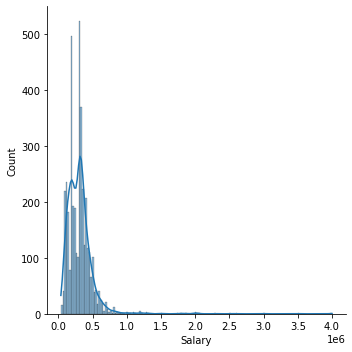

In [191]:
sns.displot(data = df_numerical, x= 'Salary',kde= True)

<AxesSubplot:xlabel='Salary'>

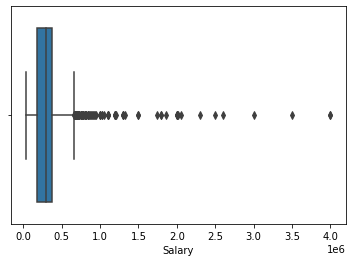

In [192]:
sns.boxplot(data = df_numerical, x='Salary')

In [193]:
df.shape

(3998, 39)

In [194]:
df_sal_sorted  = df_numerical.sort_values(by= 'Salary', ascending = False)[80:]
#Removing the outlier by arranging the data in descending...order.

<AxesSubplot:xlabel='Salary'>

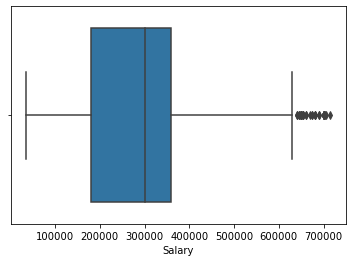

In [195]:
sns.boxplot(data = df_sal_sorted, x= 'Salary')
#For majority of majority of the candidates the starting salary range is 2lakh to 4 lakhs.

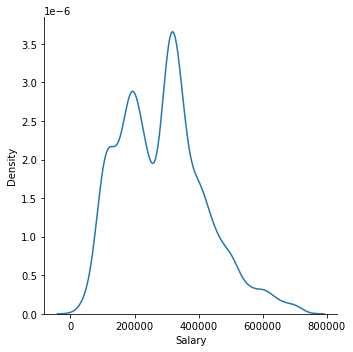

In [196]:
sns.displot(data = df_sal_sorted, x ='Salary', kind = 'kde')

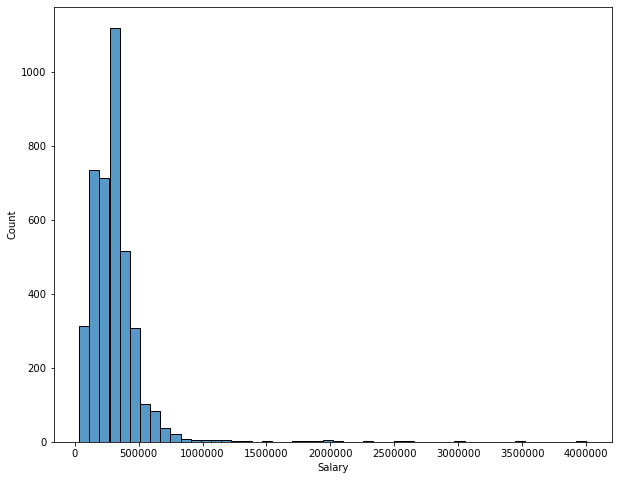

In [197]:
plt.figure(figsize = (10,8))
sns.histplot(data = df, x ='Salary', bins=50)

plt.gca().ticklabel_format(axis='both', style='plain', useOffset=False)

In [198]:
df_numerical

Salary  10percentage  12percentage  collegeGPA  English  Logical  \
0      420000         84.30         95.80       78.00      515      585   
1      500000         85.40         85.00       70.06      695      610   
2      325000         85.00         68.20       70.00      615      545   
3     1100000         85.60         83.60       74.64      635      585   
4      200000         78.00         76.80       73.90      545      625   
...       ...           ...           ...         ...      ...      ...   
3993   280000         52.09         55.50       61.50      365      334   
3994   100000         90.00         93.00       77.30      415      410   
3995   320000         81.86         65.50       70.00      475      475   
3996   200000         78.72         69.88       70.42      450      410   
3997   400000         70.60         68.00       68.00      565      515   

      Quant    Domain  ComputerProgramming  ElectronicsAndSemicon  \
0       525  0.635979                445.0                    NaN   
1       780  0.960603                  NaN                  466.0   
2       370  0.450877                395.0                    NaN   
3       625  0.974396                615.0                    NaN   
4       465  0.124502                  NaN                  233.0   
...     ...       ...                  ...                    ...   
3993    475  0.276047                345.0                    NaN   
3994    535  0.881620                325.0                  420.0   
3995    465  0.488348                405.0                    NaN   
3996    320  0.744758                445.0                    NaN   
3997    464  0.600057                435.0                    NaN   

      ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  \
0                 NaN             NaN             NaN          NaN        NaN   
1                 NaN             NaN             NaN          NaN        NaN   
2                 NaN             NaN             NaN          NaN        NaN   
3                 NaN             NaN             NaN          NaN        NaN   
4                 NaN             NaN             NaN          NaN        NaN   
...               ...             ...             ...          ...        ...   
3993              NaN             NaN             NaN          NaN        NaN   
3994              NaN             NaN             NaN          NaN        NaN   
3995              NaN             NaN             NaN          NaN        NaN   
3996            438.0             NaN             NaN          NaN        NaN   
3997              NaN             NaN             NaN          NaN        NaN   

      conscientiousness  agreeableness  extraversion  nueroticism  \
0                0.9737         0.8128        0.5269      1.35490   
1               -0.7335         0.3789        1.2396     -0.10760   
2                0.2718         1.7109        0.1637     -0.86820   
3                0.0464         0.3448       -0.3440     -0.40780   
4               -0.8810        -0.2793       -1.0697      0.09163   
...                 ...            ...           ...          ...   
3993            -0.1082         0.3448        0.2366      0.64980   
3994            -0.3027         0.8784        0.9322      0.77980   
3995            -1.5765        -1.5273       -1.5051     -1.31840   
3996            -0.1590         0.0459       -0.4511     -0.36120   
3997            -1.1128        -0.2793       -0.6343      1.32553   

      openess_to_experience  
0                   -0.4455  
1                    0.8637  
2                    0.6721  
3                   -0.9194  
4                   -0.1295  
...                     ...  
3993                -0.9194  
3994                -0.0943  
3995                -0.7615  
3996                -0.0943  
3997                -0.6035  

[3998 rows x 20 columns]

<AxesSubplot:xlabel='10percentage'>

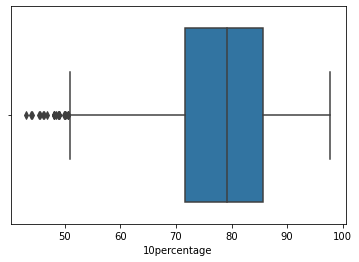

In [199]:
sns.boxplot(data = df_numerical, x="10percentage")
#Majority of the candidates scores are between 70 and 90% 
#There are quite a few number of students with scores less than 50% and they are considered to be outliers.

<AxesSubplot:xlabel='10percentage', ylabel='Count'>

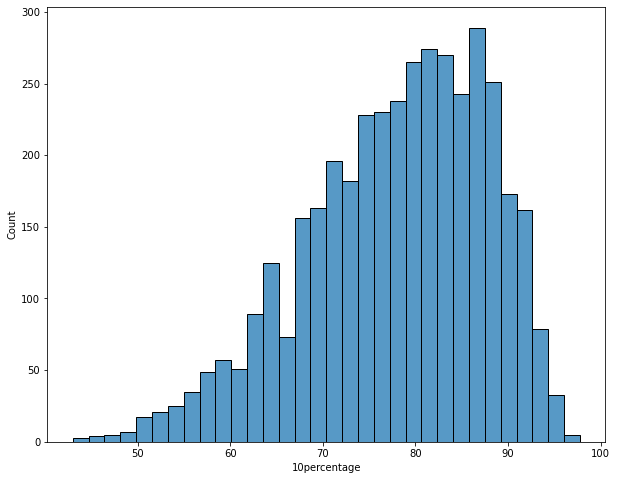

In [200]:
plt.figure(figsize = (10,8))
sns.histplot(data = df_numerical, x ='10percentage')

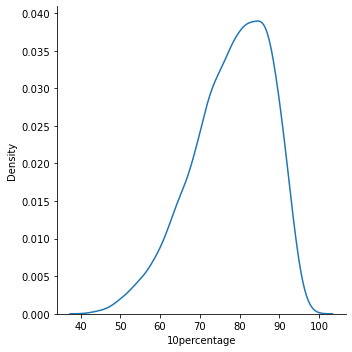

In [201]:
sns.displot(data = df_numerical, x ='10percentage', kind = 'kde')
#The data here is right skewed.

<AxesSubplot:xlabel='12percentage'>

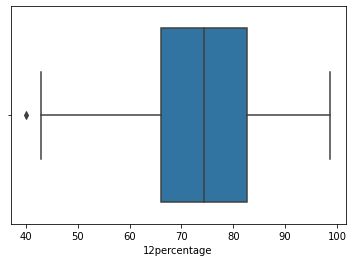

In [202]:
sns.boxplot(data = df_numerical, x="12percentage")

<AxesSubplot:xlabel='12percentage', ylabel='Count'>

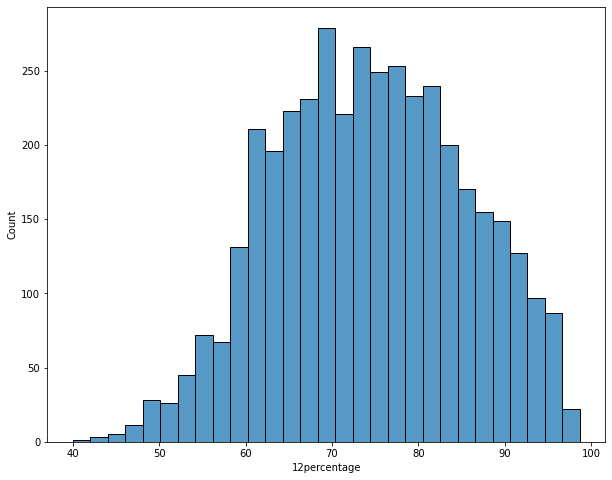

In [203]:
plt.figure(figsize = (10,8))
sns.histplot(data = df_numerical, x ='12percentage')

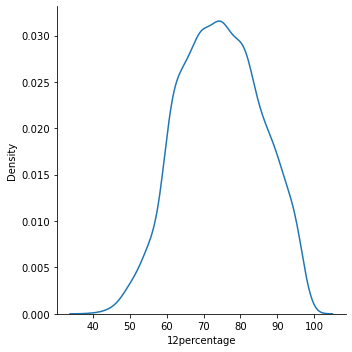

In [204]:
sns.displot(data = df_numerical, x ='12percentage', kind = 'kde')
#The data here is right skewed.

In [205]:
df_numerical['collegeGPA'] = df_numerical['collegeGPA'].apply(lambda x:x *10 if x<=10 else x)
# sns.boxplot(data = df_numerical, x="collegeGPA")

<AxesSubplot:xlabel='collegeGPA'>

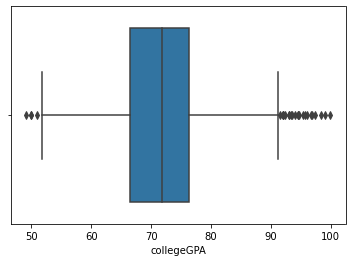

In [206]:
sns.boxplot(data = df_numerical, x="collegeGPA")
#most of the candidates score around 70% in their college exams.

<AxesSubplot:xlabel='collegeGPA', ylabel='Count'>

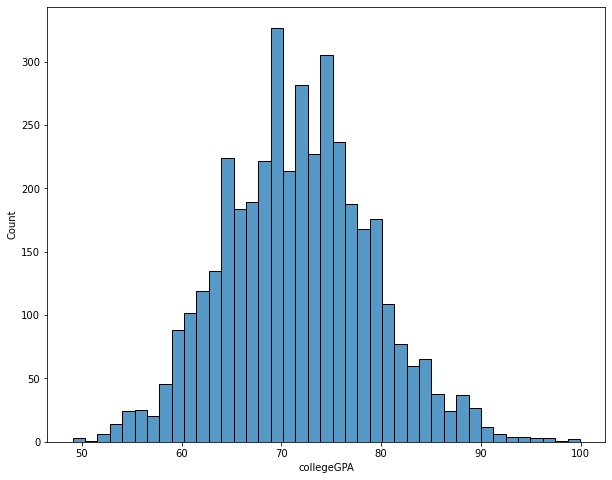

In [207]:
plt.figure(figsize = (10,8))
sns.histplot(data = df_numerical, x ='collegeGPA')

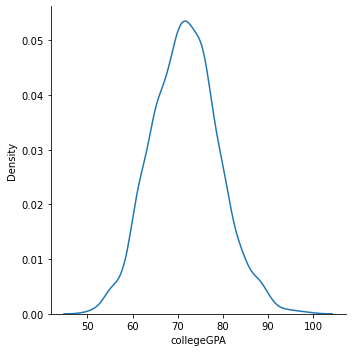

In [208]:
sns.displot(data = df_numerical, x ='collegeGPA', kind = 'kde')
#The data here is right skewed.

In [209]:
df_numerical

Salary  10percentage  12percentage  collegeGPA  English  Logical  \
0      420000         84.30         95.80       78.00      515      585   
1      500000         85.40         85.00       70.06      695      610   
2      325000         85.00         68.20       70.00      615      545   
3     1100000         85.60         83.60       74.64      635      585   
4      200000         78.00         76.80       73.90      545      625   
...       ...           ...           ...         ...      ...      ...   
3993   280000         52.09         55.50       61.50      365      334   
3994   100000         90.00         93.00       77.30      415      410   
3995   320000         81.86         65.50       70.00      475      475   
3996   200000         78.72         69.88       70.42      450      410   
3997   400000         70.60         68.00       68.00      565      515   

      Quant    Domain  ComputerProgramming  ElectronicsAndSemicon  \
0       525  0.635979                445.0                    NaN   
1       780  0.960603                  NaN                  466.0   
2       370  0.450877                395.0                    NaN   
3       625  0.974396                615.0                    NaN   
4       465  0.124502                  NaN                  233.0   
...     ...       ...                  ...                    ...   
3993    475  0.276047                345.0                    NaN   
3994    535  0.881620                325.0                  420.0   
3995    465  0.488348                405.0                    NaN   
3996    320  0.744758                445.0                    NaN   
3997    464  0.600057                435.0                    NaN   

      ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  \
0                 NaN             NaN             NaN          NaN        NaN   
1                 NaN             NaN             NaN          NaN        NaN   
2                 NaN             NaN             NaN          NaN        NaN   
3                 NaN             NaN             NaN          NaN        NaN   
4                 NaN             NaN             NaN          NaN        NaN   
...               ...             ...             ...          ...        ...   
3993              NaN             NaN             NaN          NaN        NaN   
3994              NaN             NaN             NaN          NaN        NaN   
3995              NaN             NaN             NaN          NaN        NaN   
3996            438.0             NaN             NaN          NaN        NaN   
3997              NaN             NaN             NaN          NaN        NaN   

      conscientiousness  agreeableness  extraversion  nueroticism  \
0                0.9737         0.8128        0.5269      1.35490   
1               -0.7335         0.3789        1.2396     -0.10760   
2                0.2718         1.7109        0.1637     -0.86820   
3                0.0464         0.3448       -0.3440     -0.40780   
4               -0.8810        -0.2793       -1.0697      0.09163   
...                 ...            ...           ...          ...   
3993            -0.1082         0.3448        0.2366      0.64980   
3994            -0.3027         0.8784        0.9322      0.77980   
3995            -1.5765        -1.5273       -1.5051     -1.31840   
3996            -0.1590         0.0459       -0.4511     -0.36120   
3997            -1.1128        -0.2793       -0.6343      1.32553   

      openess_to_experience  
0                   -0.4455  
1                    0.8637  
2                    0.6721  
3                   -0.9194  
4                   -0.1295  
...                     ...  
3993                -0.9194  
3994                -0.0943  
3995                -0.7615  
3996                -0.0943  
3997                -0.6035  

[3998 rows x 20 columns]

<AxesSubplot:xlabel='English'>

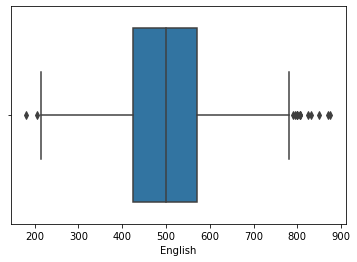

In [210]:
sns.boxplot(data = df_numerical, x="English")

<AxesSubplot:xlabel='English', ylabel='Count'>

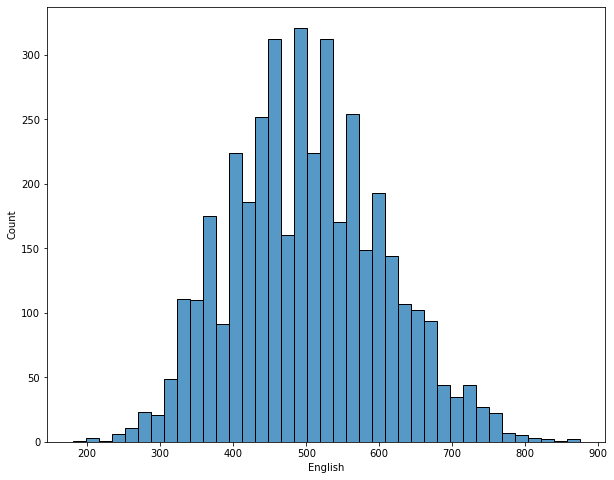

In [211]:
plt.figure(figsize = (10,8))
sns.histplot(data = df_numerical, x ='English')

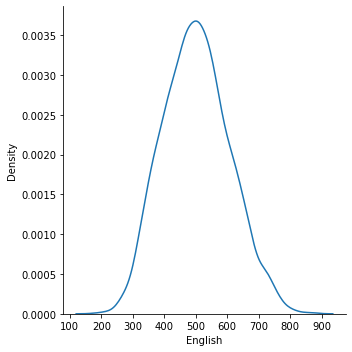

In [212]:
sns.displot(data = df_numerical, x ='English', kind = 'kde')

Unnamed: 0      ID  Salary        DOJ      DOL      Designation JobCity  \
1014      train  649530  350000 2014-02-01  present  system engineer    Pune   

     Gender        DOB  10percentage  ... ComputerScience  MechanicalEngg  \
1014      m 1991-01-25         80.53  ...              -1              -1   

      ElectricalEngg TelecomEngg  CivilEngg  conscientiousness agreeableness  \
1014              -1          -1         -1            -0.4463        1.3779   

     extraversion  nueroticism  openess_to_experience  
1014       0.9322       -0.995                 0.8637  

[1 rows x 39 columns]

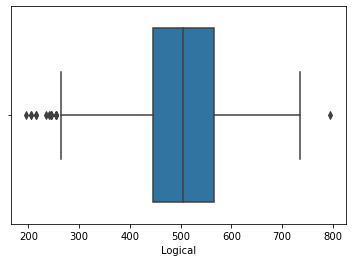

In [213]:
sns.boxplot(data = df_numerical, x="Logical")
df[df['Logical']>750]



count           mean            std         min  \
ID                      21.0  296171.000000  284177.749511  43693.0000   
Salary                  21.0  241904.761905  137454.321417  95000.0000   
10percentage            21.0      71.520000      10.284357     54.5000   
12graduation            21.0    2006.571429       1.690309   2004.0000   
12percentage            21.0      67.208095       9.191774     50.0000   
CollegeID               21.0    4512.476190    3784.816992     55.0000   
CollegeTier             21.0       2.000000       0.000000      2.0000   
collegeGPA              21.0      63.257619      14.515621      8.0700   
CollegeCityID           21.0    4512.476190    3784.816992     55.0000   
CollegeCityTier         21.0       0.285714       0.462910      0.0000   
GraduationYear          21.0    2011.380952       1.465476   2010.0000   
English                 21.0     395.904762      69.185912    295.0000   
Logical                 21.0     240.952381      21.541765    195.0000   
Quant                   21.0     380.714286      96.841181    210.0000   
Domain                  21.0       0.293781       0.397757     -1.0000   
ComputerProgramming     21.0     269.380952     151.915265     -1.0000   
ElectronicsAndSemicon   21.0     148.333333     160.226194     -1.0000   
ComputerScience         21.0      14.047619      68.956853     -1.0000   
MechanicalEngg          21.0      56.571429     146.046079     -1.0000   
ElectricalEngg          21.0      -1.000000       0.000000     -1.0000   
TelecomEngg             21.0      13.952381      68.520418     -1.0000   
CivilEngg               21.0      11.428571      56.954869     -1.0000   
conscientiousness       21.0      -0.887919       1.087096     -2.8903   
agreeableness           21.0      -1.109643       1.187080     -2.9511   
extraversion            21.0      -0.607043       0.944114     -2.2308   
nueroticism             21.0       0.122961       0.643738     -1.2303   
openess_to_experience   21.0      -1.131519       1.611931     -5.8428   

                                 25%            50%            75%  \
ID                      65483.000000  245986.000000  340045.000000   
Salary                 130000.000000  205000.000000  325000.000000   
10percentage               63.000000      73.000000      79.200000   
12graduation             2006.000000    2006.000000    2007.000000   
12percentage               60.000000      70.000000      72.200000   
CollegeID                 713.000000    4036.000000    6953.000000   
CollegeTier                 2.000000       2.000000       2.000000   
collegeGPA                 61.000000      66.000000      68.000000   
CollegeCityID             713.000000    4036.000000    6953.000000   
CollegeCityTier             0.000000       0.000000       1.000000   
GraduationYear           2010.000000    2011.000000    2012.000000   
English                   345.000000     375.000000     445.000000   
Logical                   235.000000     245.000000     255.000000   
Quant                     325.000000     365.000000     445.000000   
Domain                      0.112139       0.276047       0.563268   
ComputerProgramming       155.000000     315.000000     385.000000   
ElectronicsAndSemicon      -1.000000     133.000000     300.000000   
ComputerScience            -1.000000      -1.000000      -1.000000   
MechanicalEngg             -1.000000      -1.000000      -1.000000   
ElectricalEngg             -1.000000      -1.000000      -1.000000   
TelecomEngg                -1.000000      -1.000000      -1.000000   
CivilEngg                  -1.000000      -1.000000      -1.000000   
conscientiousness          -1.344700      -0.881000      -0.108200   
agreeableness              -2.073300      -0.953100      -0.123200   
extraversion               -1.251100      -0.779400       0.091400   
nueroticism                -0.290200       0.297300       0.526200   
openess_to_experience      -1.551300      -0.761500      -0.

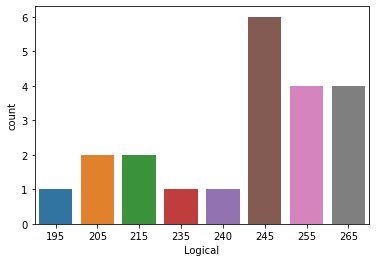

In [214]:

sns.countplot(data = df[df['Logical']<270],x = "Logical" )
df[df['Logical']<270].describe().T

<AxesSubplot:xlabel='Logical', ylabel='Count'>

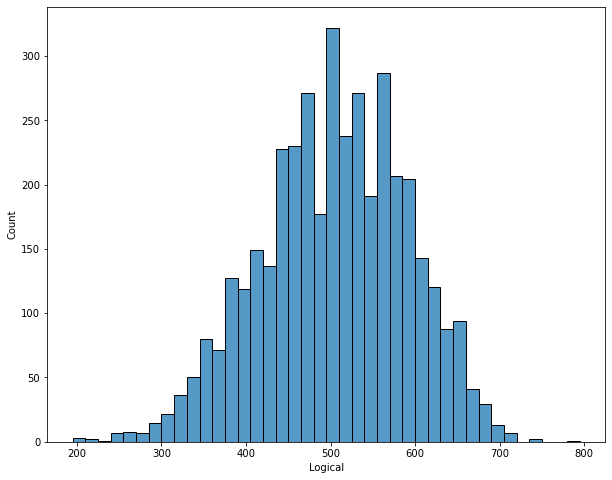

In [215]:
plt.figure(figsize = (10,8))
sns.histplot(data = df_numerical, x ='Logical')

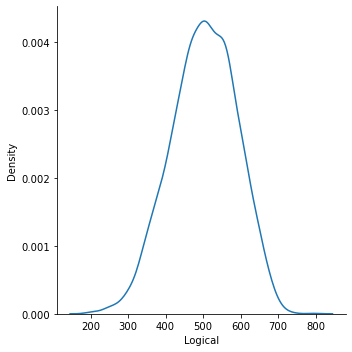

In [216]:
sns.displot(data = df_numerical, x ='Logical', kind = 'kde')

Salary  10percentage  12percentage  collegeGPA  English  Logical  Quant  \
195   350000         82.00         81.20       71.67      580      640    870   
698   300000         91.71         88.83       75.00      545      540    860   
899   320000         89.10         97.80       85.70      500      595    870   
1310  450000         87.00         92.50       75.64      570      645    870   
1661  605000         78.80         87.00       77.40      570      630    870   
2007  350000         91.30         91.20       70.00      520      605    855   
2155  320000         94.60         91.20       80.00      555      495    870   
2411  390000         81.60         81.80       65.20      545      620    885   
2490   80000         85.60         79.80       66.64      570      640    900   
2957  770000         79.60         87.60       79.68      580      670    900   
2988  500000         95.20         91.40       94.60      710      560    885   
3165  410000         84.33         93.80       73.70      405      475    855   
3239  325000         91.20         80.00       79.42      765      645    855   

        Domain  ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
195   0.622643                625.0                    NaN            407.0   
698   0.493596                525.0                  324.0            253.0   
899   0.960603                475.0                  466.0              NaN   
1310  0.985461                415.0                  500.0              NaN   
1661  0.979522                625.0                    NaN              NaN   
2007  0.229482                315.0                  266.0            407.0   
2155 -1.000000                755.0                    NaN              NaN   
2411  0.979522                625.0                    NaN              NaN   
2490  0.960903                595.0                    NaN              NaN   
2957  0.990009                655.0                    NaN              NaN   
2988  0.824666                445.0                  400.0              NaN   
3165  0.992259                665.0                    NaN              NaN   
3239  0.338786                555.0                  292.0              NaN   

      MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  \
195              NaN             NaN          NaN        NaN   
698              NaN             NaN          NaN        NaN   
899              NaN             NaN          NaN        NaN   
1310             NaN           553.0          NaN        NaN   
1661             NaN             NaN          NaN        NaN   
2007             NaN             NaN        393.0        NaN   
2155             NaN             NaN          NaN        NaN   
2411             NaN             NaN          NaN        NaN   
2490             NaN             NaN          NaN        NaN   
2957             NaN             NaN          NaN        NaN   
2988             NaN             NaN          NaN        NaN   
3165             NaN             NaN          NaN        NaN   
3239             NaN             NaN        286.0        NaN   

      conscientiousness  agreeableness  extraversion  nueroticism  \
195             -0.5899         1.0449        0.3174      -1.2486   
698              1.1336         1.0449        0.7785      -0.8682   
899             -0.4463        -0.2871       -1.2196       1.0333   
1310             0.7027        -0.1206       -0.1437      -2.0092   
1661             0.5591         0.0459        0.1637       0.1459   
2007            -0.0154         0.8784       -0.6048      -0.9950   
2155             1.5644         0.8784        2.0080      -2.6430   
2411             0.9900         1.3779       -0.1437      -0.8682   
2490            -0.4463         0.0459       -0.1437       0.1459   
2957            -1.1901        -0.1232       -0.3440       0.1798   
2988             0.1282         0.2124        0.1637      -0.4879   
3165             0.1282        -0.6201 

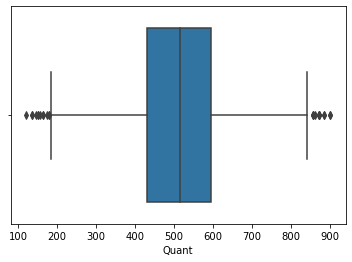

In [217]:
sns.boxplot(data = df_numerical, x="Quant")
df_numerical[df_numerical['Quant']> 840]

In [218]:
df_numerical[df_numerical['Quant']< 180].describe()

Salary  10percentage  12percentage  collegeGPA     English  \
count      10.000000       10.0000     10.000000   10.000000   10.000000   
mean   143500.000000       71.2730     68.457000   69.540000  423.000000   
std     62585.497078       11.3338      9.306129    4.814453   99.420543   
min     55000.000000       54.0000     56.800000   62.000000  285.000000   
25%    102500.000000       67.9150     62.250000   67.760000  356.250000   
50%    135000.000000       71.5000     65.485000   68.805000  410.000000   
75%    191250.000000       77.2650     74.875000   72.677500  468.750000   
max    240000.000000       91.5000     84.500000   76.000000  605.000000   

         Logical       Quant     Domain  ComputerProgramming  \
count   10.00000   10.000000  10.000000             8.000000   
mean   421.00000  149.500000   0.309017           368.750000   
std     61.04643   16.574747   0.212528            39.977672   
min    335.00000  120.000000   0.002750           295.000000   
25%    365.00000  137.500000   0.168806           350.000000   
50%    430.00000  150.000000   0.304782           380.000000   
75%    453.75000  162.500000   0.456981           387.500000   
max    525.00000  175.000000   0.598281           425.000000   

       ElectronicsAndSemicon  ComputerScience  MechanicalEngg  ElectricalEngg  \
count                    1.0         2.000000         2.00000             1.0   
mean                   300.0       238.000000       391.50000           206.0   
std                      NaN       152.735065        21.92031             NaN   
min                    300.0       130.000000       376.00000           206.0   
25%                    300.0       184.000000       383.75000           206.0   
50%                    300.0       238.000000       391.50000           206.0   
75%                    300.0       292.000000       399.25000           206.0   
max                    300.0       346.000000       407.00000           206.0   

       TelecomEngg  CivilEngg  conscientiousness  agreeableness  extraversion  \
count          1.0        0.0          10.000000      10.000000     10.000000   
mean         286.0        NaN          -0.150860      -0.036040      0.218870   
std            NaN        NaN           0.833873       0.748723      0.675163   
min          286.0        NaN          -1.653800      -0.953100     -0.758500   
25%          286.0        NaN          -0.504600      -0.573900     -0.143700   
50%          286.0        NaN          -0.087200      -0.123200      0.131850   
75%          286.0        NaN           0.327625       0.045900      0.740075   
max          286.0        NaN           1.133600       1.544400      1.239600   

       nueroticism  openess_to_experience  
count    10.000000              10.000000  
mean      0.757210              -0.093770  
std       0.924343               0.976624  
min      -0.741500              -1.867300  
25%       0.019175              -0.429675  
50%       0.983850              -0.016100  
75%       1.464650               0.263275  
max       2.047500               1.438600

<AxesSubplot:xlabel='Quant', ylabel='Count'>

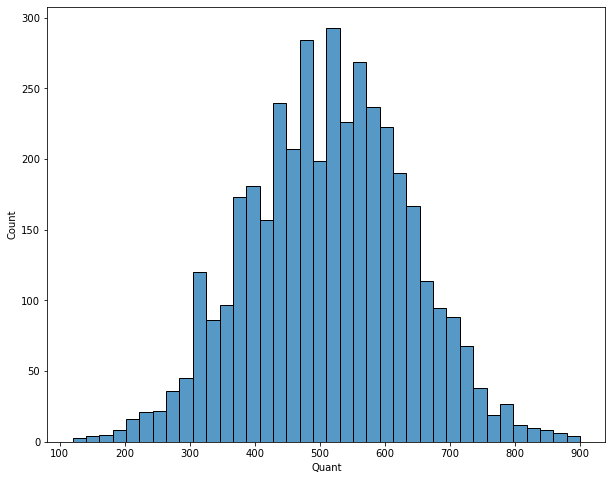

In [219]:
plt.figure(figsize = (10,8))
sns.histplot(data = df_numerical, x ='Quant')

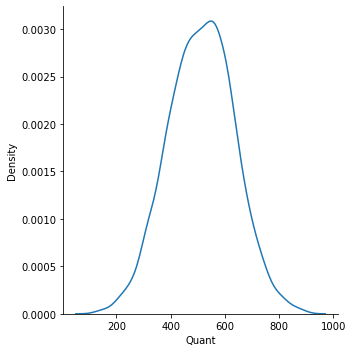

In [220]:
sns.displot(data = df_numerical, x ='Quant', kind = 'kde')

<AxesSubplot:xlabel='Domain'>

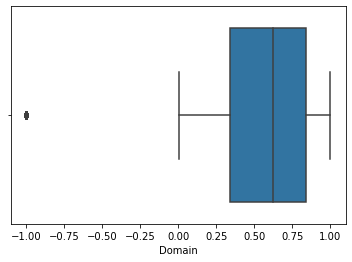

In [221]:
sns.boxplot(data = df_numerical, x="Domain")

In [222]:
df_numerical[df_numerical['Domain']<0]

Salary  10percentage  12percentage  collegeGPA  English  Logical  Quant  \
5     300000         89.92          87.0       76.32      560      555    620   
14    300000         81.20          79.9       67.67      395      565    645   
16    325000         85.80          74.8       64.80      685      530    620   
22    190000         92.50          95.2       76.00      395      455    485   
35    350000         85.00          61.0       64.98      570      475    430   
...      ...           ...           ...         ...      ...      ...    ...   
3942  280000         78.00          91.0       64.62      405      425    380   
3958  310000         79.90          89.4       77.15      385      510    585   
3960  240000         77.00          69.0       84.10      490      590    655   
3969  330000         76.00          89.8       62.00      595      530    630   
3978  320000         89.70          86.7       80.00      720      675    570   

      Domain  ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
5       -1.0                645.0                    NaN            407.0   
14      -1.0                495.0                    NaN            376.0   
16      -1.0                515.0                    NaN              NaN   
22      -1.0                455.0                    NaN              NaN   
35      -1.0                  NaN                    NaN              NaN   
...      ...                  ...                    ...              ...   
3942    -1.0                405.0                    NaN            346.0   
3958    -1.0                355.0                    NaN            438.0   
3960    -1.0                385.0                    NaN              NaN   
3969    -1.0                  NaN                    NaN              NaN   
3978    -1.0                  NaN                    NaN              NaN   

      MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  \
5                NaN             NaN          NaN        NaN   
14               NaN             NaN          NaN        NaN   
16               NaN             NaN          NaN        NaN   
22               NaN             NaN          NaN        NaN   
35               NaN             NaN          NaN        NaN   
...              ...             ...          ...        ...   
3942             NaN             NaN          NaN        NaN   
3958             NaN             NaN          NaN        NaN   
3960             NaN             NaN          NaN        NaN   
3969             NaN             NaN          NaN        NaN   
3978             NaN             NaN          NaN        NaN   

      conscientiousness  agreeableness  extraversion  nueroticism  \
5               -0.3027        -0.6201       -2.2954      -0.7415   
14               0.7027         0.7119        0.0100      -0.9950   
16               1.1336         1.0449        0.7785      -0.6147   
22              -0.4463        -0.6201       -0.6048       0.7798   
35              -0.4854        -0.5213        2.1129      -0.7350   
...                 ...            ...           ...          ...   
3942             1.7081        -0.9531        0.1637      -1.6289   
3958            -0.1590         0.5454        0.4711      -0.1076   
3960             0.5591         0.7119        0.4711      -1.6289   
3969             0.5591         0.7119        0.0100      -0.2344   
3978             0.2718         1.2114        0.4711      -0.1076   

      openess_to_experience  
5                   -0.8608  
14                   0.6721  
16                  -0.8608  
22                  -2.7769  
35                   1.8224  
...                     ...  
3942                -0.8608  
3958                 0.8637  
3960                 0.6721  
3969                 0.8637  
3978                 0.8637  

[246 rows x 20 columns]

In [223]:
df_numerical.Domain = df_numerical.Domain.apply(lambda x: np.nan if x ==-1 else x)

<AxesSubplot:xlabel='Domain'>

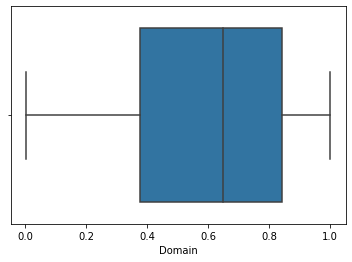

In [224]:
sns.boxplot(data = df_numerical, x="Domain")

<AxesSubplot:xlabel='Domain', ylabel='Count'>

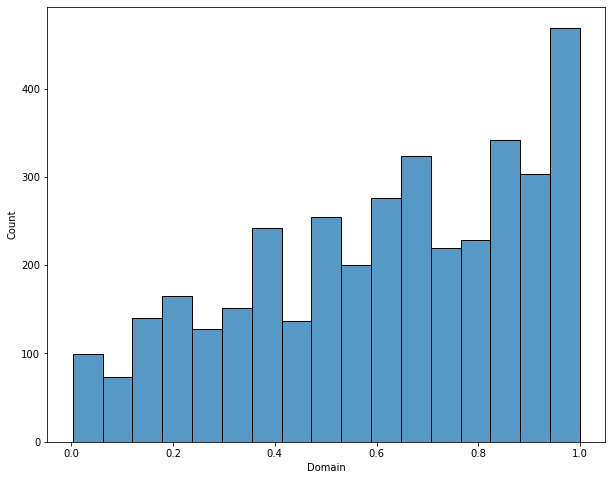

In [225]:
plt.figure(figsize = (10,8))
sns.histplot(data = df_numerical, x ='Domain')

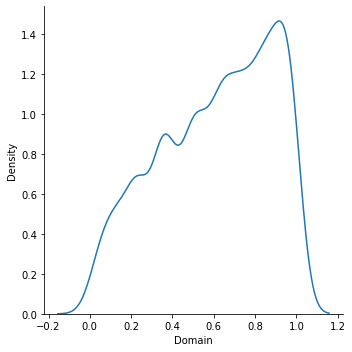

In [226]:
sns.displot(data = df_numerical, x ='Domain', kind = 'kde')

<AxesSubplot:xlabel='ComputerProgramming'>

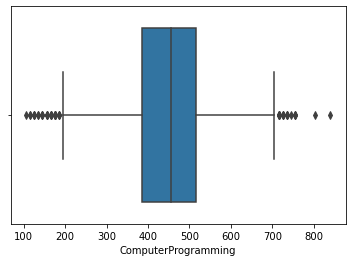

In [227]:
sns.boxplot(data = df_numerical, x="ComputerProgramming")

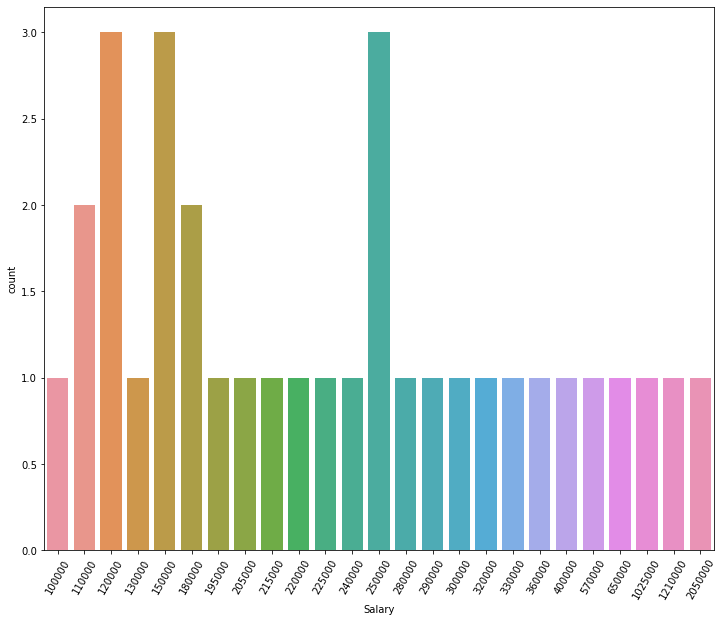

In [228]:
plt.figure(figsize = (12,10))
sns.countplot(data = df_numerical[df_numerical['ComputerProgramming']<200], x = 'Salary')
plt.xticks(rotation = 60);

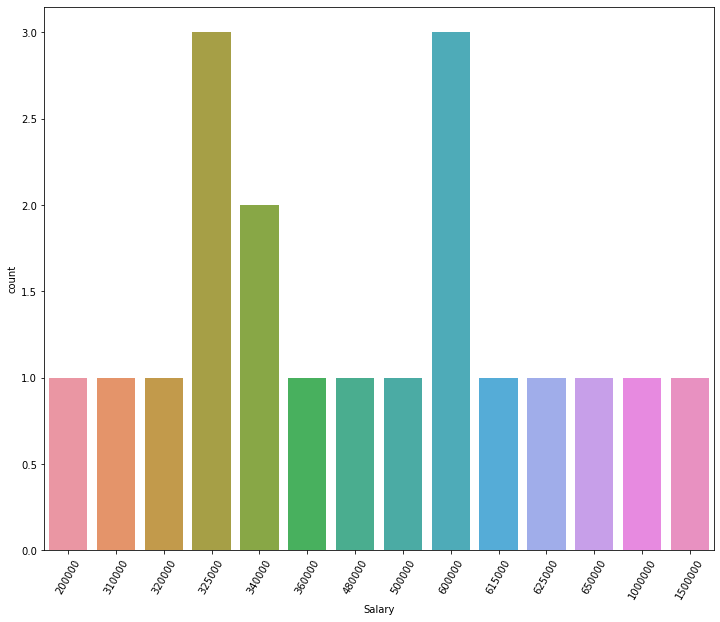

In [229]:
plt.figure(figsize = (12,10))
sns.countplot(data = df_numerical[df_numerical['ComputerProgramming']>700], x = 'Salary')
plt.xticks(rotation = 60);

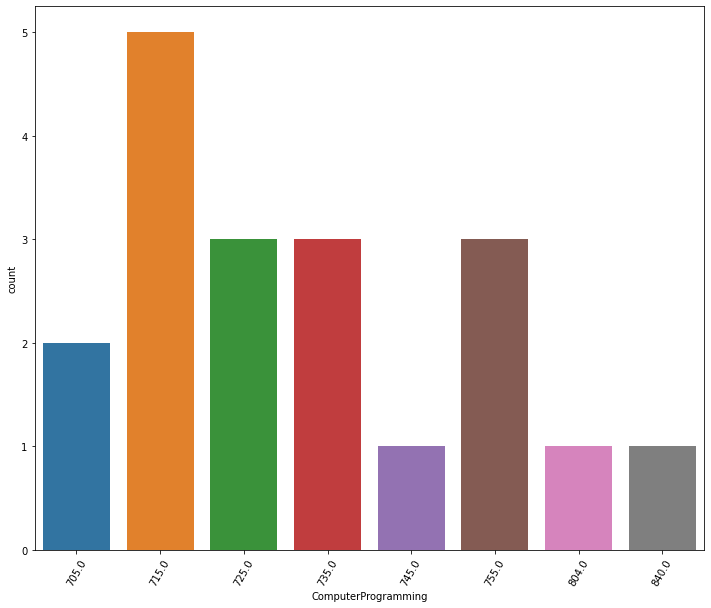

In [230]:
plt.figure(figsize = (12,10))
sns.countplot(data = df_numerical[df_numerical['ComputerProgramming']>700], x = 'ComputerProgramming')
plt.xticks(rotation = 60);

<AxesSubplot:xlabel='ComputerProgramming', ylabel='Count'>

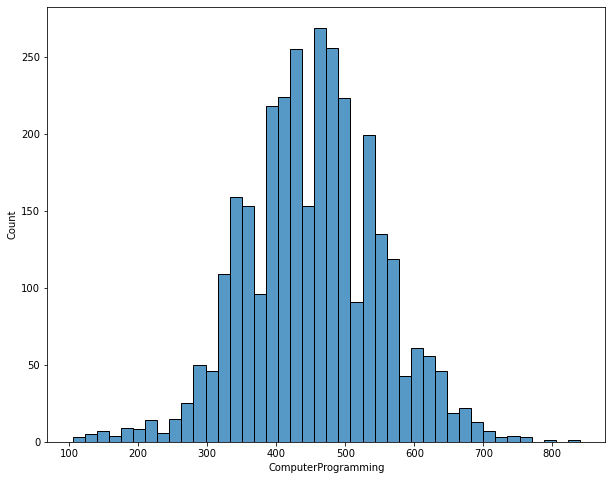

In [231]:
plt.figure(figsize = (10,8))
sns.histplot(data = df_numerical, x ='ComputerProgramming')

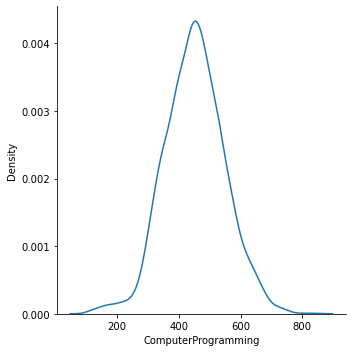

In [232]:
sns.displot(data = df_numerical, x ='ComputerProgramming', kind = 'kde')

<AxesSubplot:xlabel='ElectronicsAndSemicon'>

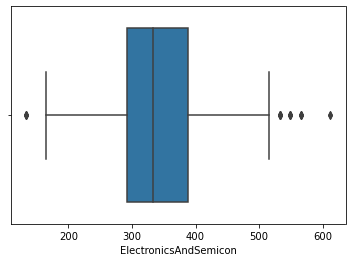

In [233]:
sns.boxplot(data = df_numerical, x="ElectronicsAndSemicon")

In [234]:
df_numerical[df_numerical['ElectronicsAndSemicon']<134].describe()

Salary  10percentage  12percentage  collegeGPA     English  \
count       4.000000      4.000000      4.000000    4.000000    4.000000   
mean   227500.000000     70.750000     73.000000   69.800000  475.000000   
std    111989.582849      8.616844      8.485281   11.507679   57.154761   
min    120000.000000     60.000000     63.000000   54.000000  425.000000   
25%    180000.000000     67.500000     67.500000   66.000000  440.000000   
50%    202500.000000     71.000000     74.000000   72.000000  460.000000   
75%    250000.000000     74.250000     79.500000   75.800000  495.000000   
max    385000.000000     81.000000     81.000000   81.200000  555.000000   

          Logical       Quant    Domain  ComputerProgramming  \
count    4.000000    4.000000  4.000000                  1.0   
mean   385.000000  467.500000  0.008155                415.0   
std    141.421356  105.316982  0.000000                  NaN   
min    205.000000  325.000000  0.008155                415.0   
25%    325.000000  422.500000  0.008155                415.0   
50%    395.000000  490.000000  0.008155                415.0   
75%    455.000000  535.000000  0.008155                415.0   
max    545.000000  565.000000  0.008155                415.0   

       ElectronicsAndSemicon  ComputerScience  MechanicalEngg  ElectricalEngg  \
count                    4.0              0.0             0.0             0.0   
mean                   133.0              NaN             NaN             NaN   
std                      0.0              NaN             NaN             NaN   
min                    133.0              NaN             NaN             NaN   
25%                    133.0              NaN             NaN             NaN   
50%                    133.0              NaN             NaN             NaN   
75%                    133.0              NaN             NaN             NaN   
max                    133.0              NaN             NaN             NaN   

       TelecomEngg  CivilEngg  conscientiousness  agreeableness  extraversion  \
count          1.0        0.0           4.000000       4.000000      4.000000   
mean         340.0        NaN           0.278200      -0.659500     -0.470975   
std            NaN        NaN           0.624668       1.602498      1.318770   
min          340.0        NaN          -0.571900      -2.619300     -2.375900   
25%          340.0        NaN           0.007700      -1.595550     -0.797525   
50%          340.0        NaN           0.432750      -0.493750     -0.053700   
75%          340.0        NaN           0.703250       0.442300      0.272850   
max          340.0        NaN           0.819200       0.968800      0.599400   

       nueroticism  openess_to_experience  
count     4.000000               4.000000  
mean      0.062297              -0.406025  
std       0.925240               0.710906  
min      -1.112770              -1.393400  
25%      -0.319593              -0.682475  
50%       0.121065              -0.208550  
75%       0.502955               0.067900  
max       1.119830               0.186400

<Figure size 432x288 with 0 Axes>

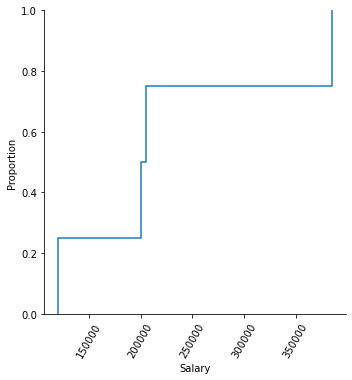

In [235]:
plt.figure()
sns.displot(kind='ecdf',data =df_numerical[df_numerical['ElectronicsAndSemicon']<134], x ='Salary' )
plt.xticks(rotation = 60);

In [236]:
df_numerical[df_numerical['ElectronicsAndSemicon']>520].describe().T

count           mean            std            min  \
Salary                  17.0  323823.529412  102660.383848  180000.000000   
10percentage            17.0      81.832941       9.783575      62.500000   
12percentage            17.0      77.094118      11.677889      63.300000   
collegeGPA              17.0      75.359412       5.454642      65.000000   
English                 17.0     593.823529      93.349635     395.000000   
Logical                 17.0     537.941176      88.935701     285.000000   
Quant                   17.0     597.294118      98.976490     415.000000   
Domain                  16.0       0.995369       0.008003       0.966007   
ComputerProgramming      7.0     556.428571      64.660284     475.000000   
ElectronicsAndSemicon   17.0     554.470588      25.157299     533.000000   
ComputerScience          0.0            NaN            NaN            NaN   
MechanicalEngg           0.0            NaN            NaN            NaN   
ElectricalEngg           3.0     544.333333      61.776479     473.000000   
TelecomEngg              5.0     414.200000      57.681886     340.000000   
CivilEngg                0.0            NaN            NaN            NaN   
conscientiousness       17.0       0.090765       1.181122      -2.117500   
agreeableness           17.0       0.282347       0.751023      -1.839300   
extraversion            17.0      -0.645041       0.986653      -3.537000   
nueroticism             17.0       0.001208       1.194070      -2.389500   
openess_to_experience   17.0      -0.049635       0.719604      -1.551300   

                                 25%            50%           75%  \
Salary                 250000.000000  325000.000000  365000.00000   
10percentage               78.800000      85.400000      89.33000   
12percentage               68.000000      71.600000      87.40000   
collegeGPA                 73.200000      74.000000      76.40000   
English                   545.000000     605.000000     645.00000   
Logical                   520.000000     555.000000     575.00000   
Quant                     525.000000     615.000000     645.00000   
Domain                      0.995266       0.997299       0.99868   
ComputerProgramming       510.000000     545.000000     600.00000   
ElectronicsAndSemicon     533.000000     548.000000     566.00000   
ComputerScience                  NaN            NaN           NaN   
MechanicalEngg                   NaN            NaN           NaN   
ElectricalEngg            526.500000     580.000000     580.00000   
TelecomEngg               366.000000     446.000000     446.00000   
CivilEngg                        NaN            NaN           NaN   
conscientiousness          -0.589900       0.128200       0.97370   
agreeableness              -0.120600       0.378900       0.87840   
extraversion               -1.069700      -0.451100       0.01000   
nueroticism                -0.525300       0.019200       0.53230   
openess_to_experience      -0.445500      -0.129500       0.67210   

                                 max  
Salary                 600000.000000  
10percentage               93.400000  
12percentage               95.900000  
collegeGPA                 90.000000  
English                   790.000000  
Logical                   665.000000  
Quant                     780.000000  
Domain                      0.999829  
ComputerProgramming       655.000000  
ElectronicsAndSemicon     612.000000  
ComputerScience                  NaN  
MechanicalEngg                   NaN  
ElectricalEngg            580.000000  
TelecomEngg               473.000000  
CivilEngg                        NaN  
conscientiousness           1.851700  
agreeableness               1.211400  
extraversion                0.624800  
nueroticism                 2.177400  
openess_to_experience       1.055400

<Figure size 432x288 with 0 Axes>

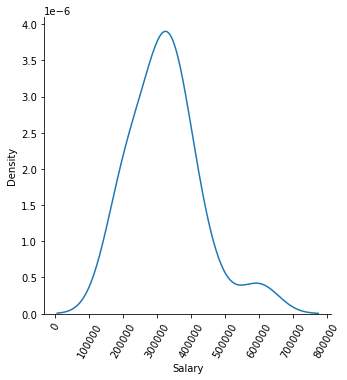

In [237]:
plt.figure()
sns.displot(kind='kde',data =df_numerical[df_numerical['ElectronicsAndSemicon']>520], x ='Salary' )
plt.xticks(rotation = 60);

<AxesSubplot:xlabel='ElectronicsAndSemicon', ylabel='Count'>

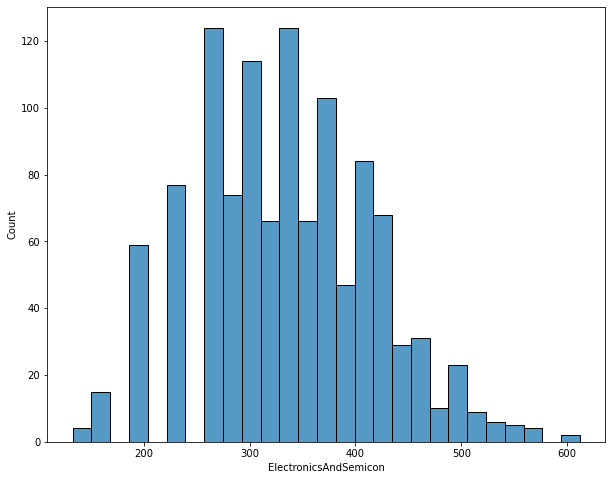

In [238]:
plt.figure(figsize = (10,8))
sns.histplot(data = df_numerical, x ='ElectronicsAndSemicon')

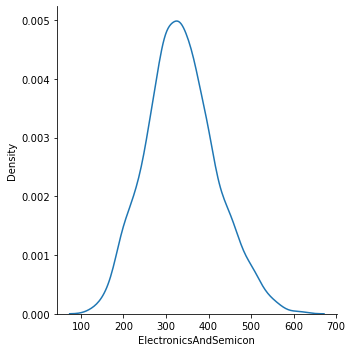

In [239]:
sns.displot(data = df_numerical, x ='ElectronicsAndSemicon', kind = 'kde')

<AxesSubplot:xlabel='ComputerScience'>

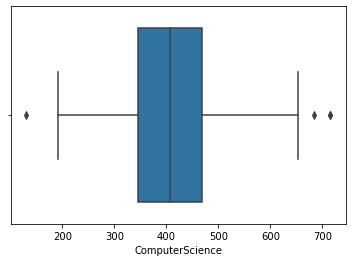

In [240]:
sns.boxplot(data = df_numerical, x="ComputerScience")

In [241]:
df_numerical[df_numerical['ComputerScience']<190]

Salary  10percentage  12percentage  collegeGPA  English  Logical  Quant  \
1815  205000          54.0          62.0        62.0      380      350    135   

       Domain  ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
1815  0.00275                385.0                    NaN            130.0   

      MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  \
1815             NaN             NaN          NaN        NaN   

      conscientiousness  agreeableness  extraversion  nueroticism  \
1815            -0.0154        -0.6201       -0.7585      -0.7415   

      openess_to_experience  
1815                 0.0973

In [242]:
df_numerical[df_numerical['ComputerScience']>680]

Salary  10percentage  12percentage  collegeGPA  English  Logical  Quant  \
318   350000          69.2          77.4       76.72      535      630    645   
2515  310000          95.0          89.0       77.00      595      545    690   
3346  325000          88.2          80.8       70.00      735      595    545   

        Domain  ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
318   0.999664                695.0                    NaN            684.0   
2515  0.999910                615.0                    NaN            715.0   
3346  0.999910                535.0                    NaN            715.0   

      MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  \
318              NaN             NaN          NaN        NaN   
2515             NaN             NaN          NaN        NaN   
3346             NaN             NaN          NaN        NaN   

      conscientiousness  agreeableness  extraversion  nueroticism  \
318             -2.3134         1.0449        0.1637       1.5404   
2515             0.5591         1.2114       -0.6048      -0.4879   
3346             1.9953         1.0449       -0.1437      -2.3895   

      openess_to_experience  
318                  0.0973  
2515                 1.6302  
3346                 0.2889

<AxesSubplot:xlabel='ComputerScience', ylabel='Count'>

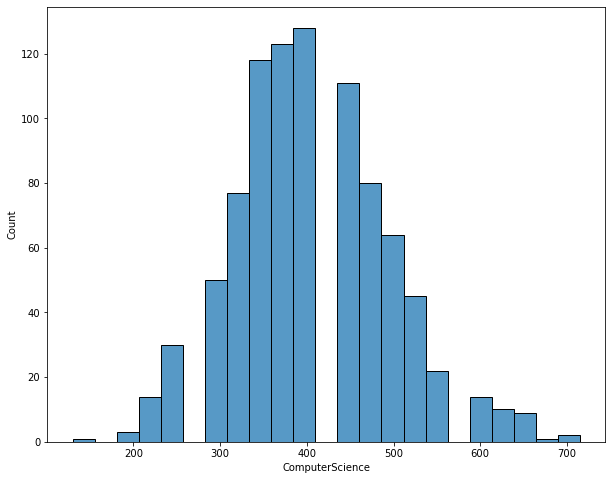

In [243]:
plt.figure(figsize = (10,8))
sns.histplot(data = df_numerical, x ='ComputerScience')

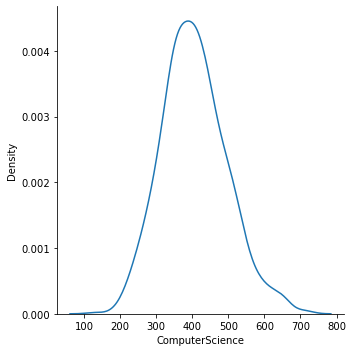

In [244]:
sns.displot(data = df_numerical, x ='ComputerScience', kind = 'kde')

<AxesSubplot:xlabel='MechanicalEngg'>

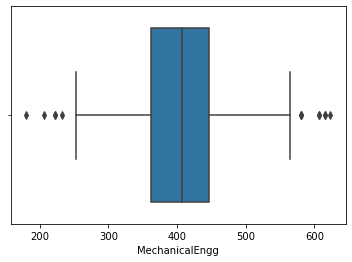

In [245]:
sns.boxplot(data = df_numerical, x="MechanicalEngg")


In [246]:
df_numerical[df_numerical['MechanicalEngg']<230]

Salary  10percentage  12percentage  collegeGPA  English  Logical  \
123   1200000         59.80         60.25       68.63      575      595   
581    260000         63.00         63.00       63.00      300      435   
1532   100000         63.33         68.15       67.21      345      415   
2218   400000         82.27         80.58       61.00      495      465   

      Quant    Domain  ComputerProgramming  ElectronicsAndSemicon  \
123     405  0.021066                  NaN                    NaN   
581     390  0.032937                  NaN                    NaN   
1532    210  0.032937                  NaN                    NaN   
2218    575  0.124502                275.0                  233.0   

      ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  \
123               NaN           206.0             NaN          NaN        NaN   
581               NaN           223.0             NaN          NaN        NaN   
1532              NaN           223.0             NaN          NaN        NaN   
2218              NaN           180.0             NaN          NaN        NaN   

      conscientiousness  agreeableness  extraversion  nueroticism  \
123              0.2009         1.1248        1.1074      -1.1128   
581              1.8517        -0.2871        1.0859       1.6672   
1532             0.7027        -0.4536        0.4711       0.7798   
2218            -0.4173        -0.7473       -0.0537       0.2973   

      openess_to_experience  
123                  0.9763  
581                 -0.2859  
1532                -0.4776  
2218                 0.0284

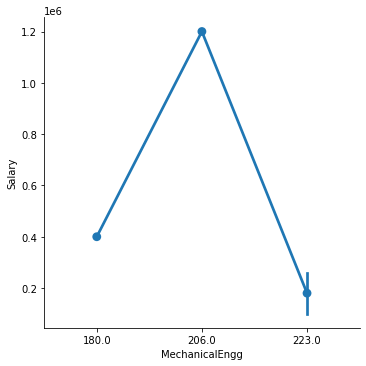

In [247]:
sns.catplot(data = df_numerical[df_numerical['MechanicalEngg']<230], x = 'MechanicalEngg', y = "Salary",kind = 'point')

In [248]:
df_numerical[df_numerical['MechanicalEngg']>570]

Salary  10percentage  12percentage  collegeGPA  English  Logical  Quant  \
847   600000         86.40         93.60       72.30      800      570    500   
1285  100000         78.40         58.40       76.50      545      535    605   
1682  440000         87.33         82.46       73.83      640      610    650   
1872  495000         94.40         94.16       87.20      495      585    585   
2767  570000         93.16         97.90       87.94      555      585    750   
2900  210000         85.00         94.60       80.02      545      510    485   
3202  205000         90.40         84.60       83.50      430      375    530   
3849  325000         89.17         96.00       84.90      490      570    665   

        Domain  ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
847   0.986525                  NaN                    NaN              NaN   
1285  0.986525                  NaN                    NaN              NaN   
1682  0.995614                  NaN                    NaN              NaN   
1872  0.995614                  NaN                    NaN              NaN   
2767  0.993917                295.0                    NaN              NaN   
2900  0.993917                  NaN                    NaN              NaN   
3202  0.986525                  NaN                    NaN              NaN   
3849  0.996536                385.0                    NaN              NaN   

      MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  \
847            580.0             NaN          NaN        NaN   
1285           580.0             NaN          NaN        NaN   
1682           616.0             NaN          NaN        NaN   
1872           616.0             NaN          NaN        NaN   
2767           606.0             NaN          NaN        NaN   
2900           606.0             NaN          NaN        NaN   
3202           580.0             NaN          NaN        NaN   
3849           623.0             NaN          NaN        NaN   

      conscientiousness  agreeableness  extraversion  nueroticism  \
847             -2.0262        -1.1196       -0.7585     -0.23440   
1285            -0.3027         1.5444        0.3174      1.54040   
1682             1.2828         0.8128        0.0914     -0.87780   
1872            -0.3014         0.3448       -0.3440     -0.43717   
2767             1.5644         0.2124       -0.2974     -2.51630   
2900            -0.5899         1.5444       -0.2974     -0.48790   
3202            -1.8083        -1.9953       -2.5210      1.07470   
3849             0.1282         0.5454       -0.4511     -1.62890   

      openess_to_experience  
847                 -0.4776  
1285                 0.8637  
1682                 0.6603  
1872                 0.3444  
2767                -0.8608  
2900                 0.6721  
3202                -2.0253  
3849                 0.6721

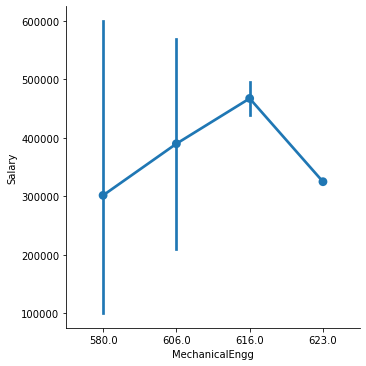

In [249]:
sns.catplot(data = df_numerical[df_numerical['MechanicalEngg']>570], x = 'MechanicalEngg', y = "Salary",kind = 'point')

<AxesSubplot:xlabel='MechanicalEngg', ylabel='Count'>

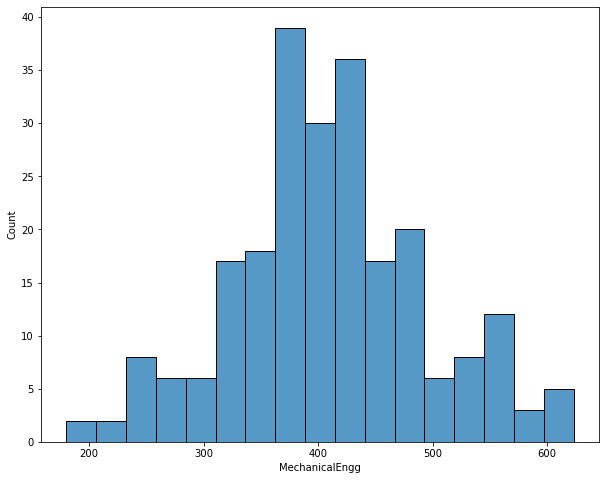

In [250]:
plt.figure(figsize = (10,8))
sns.histplot(data = df_numerical, x ='MechanicalEngg')

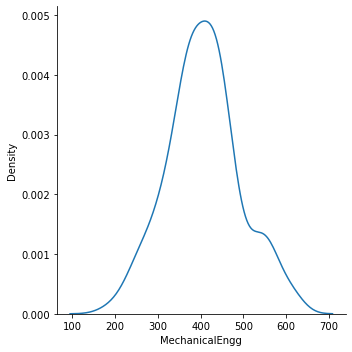

In [251]:
sns.displot(data = df_numerical, x ='MechanicalEngg', kind = 'kde')

<AxesSubplot:xlabel='ElectricalEngg'>

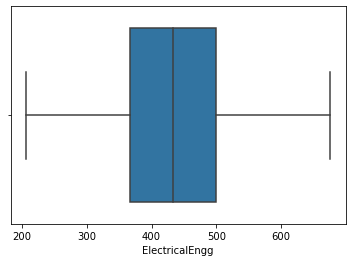

In [252]:
sns.boxplot(data = df_numerical, x="ElectricalEngg")

<AxesSubplot:xlabel='ElectricalEngg', ylabel='Count'>

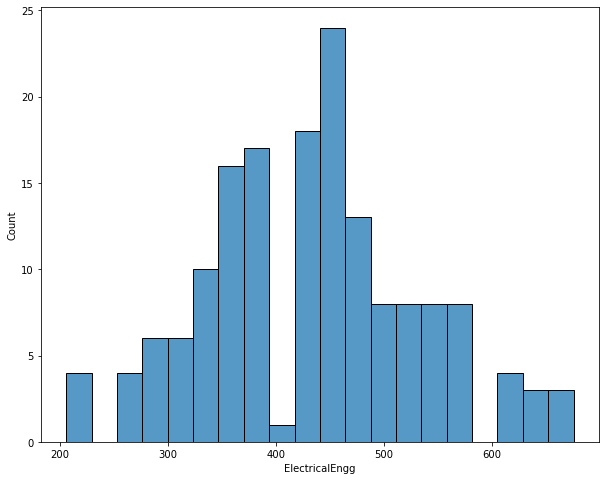

In [253]:
plt.figure(figsize = (10,8))
sns.histplot(data = df_numerical, x ='ElectricalEngg',bins = 20)

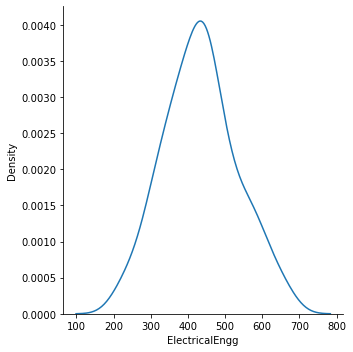

In [254]:
sns.displot(data = df_numerical, x ='ElectricalEngg', kind = 'kde')

<AxesSubplot:xlabel='TelecomEngg'>

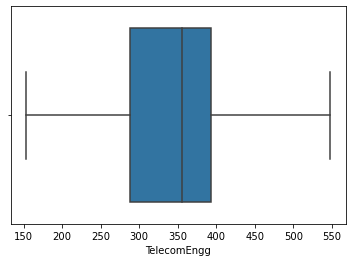

In [255]:
sns.boxplot(data = df_numerical, x="TelecomEngg")

<AxesSubplot:xlabel='TelecomEngg', ylabel='Count'>

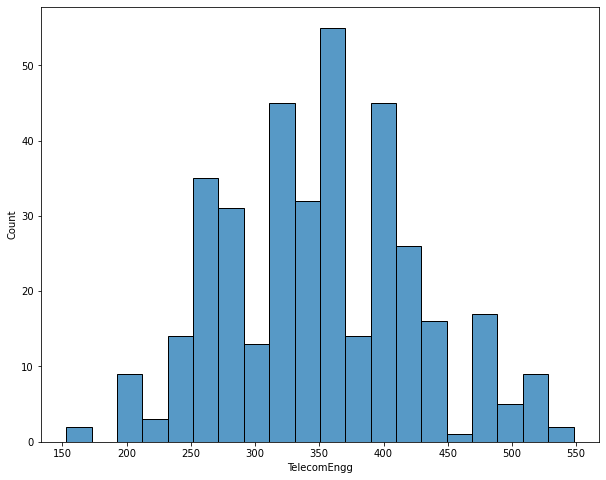

In [256]:
plt.figure(figsize = (10,8))
sns.histplot(data = df_numerical, x ='TelecomEngg',bins = 20)

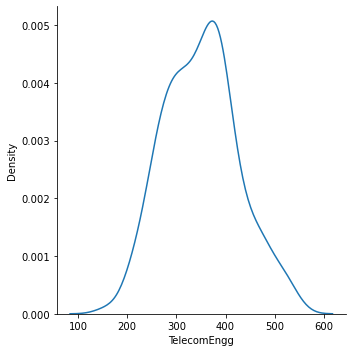

In [257]:
sns.displot(data = df_numerical, x ='TelecomEngg', kind = 'kde')

<AxesSubplot:xlabel='CivilEngg'>

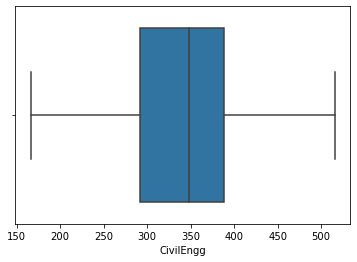

In [258]:
sns.boxplot(data = df_numerical, x="CivilEngg")

<AxesSubplot:xlabel='CivilEngg', ylabel='Count'>

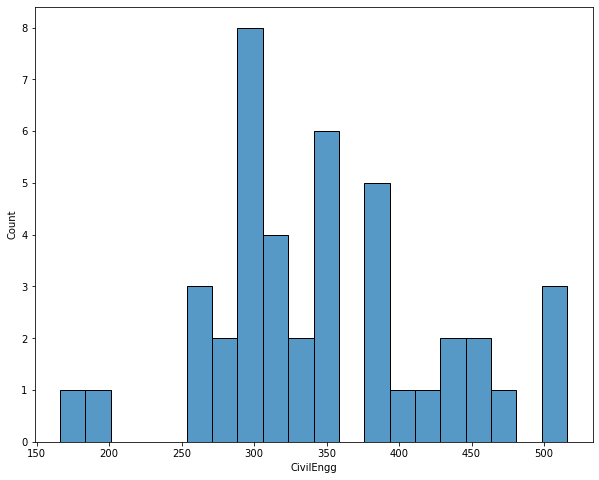

In [259]:
plt.figure(figsize = (10,8))
sns.histplot(data = df_numerical, x ='CivilEngg',bins = 20)

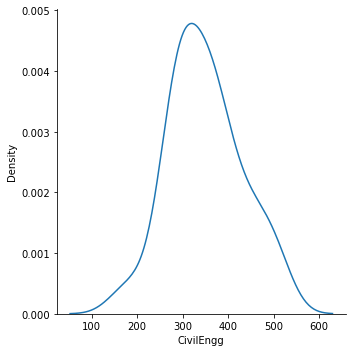

In [260]:
sns.displot(data = df_numerical, x ='CivilEngg', kind = 'kde')

<AxesSubplot:xlabel='conscientiousness'>

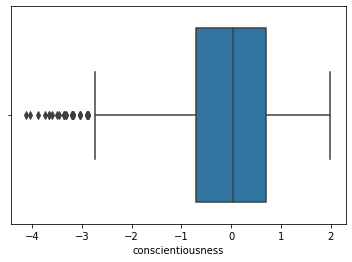

In [261]:
sns.boxplot(data = df_numerical, x="conscientiousness")

In [262]:
df_numerical[df_numerical['conscientiousness']<-2.8].describe()

Salary  10percentage  12percentage  collegeGPA     English  \
count  3.900000e+01     39.000000     39.000000   39.000000   39.000000   
mean   4.146154e+05     75.305897     71.910513   70.064359  482.282051   
std    6.084843e+05      9.591687      9.677980    7.653686   95.448787   
min    3.500000e+04     53.000000     55.000000   54.000000  290.000000   
25%    2.200000e+05     68.585000     64.000000   65.275000  405.000000   
50%    3.100000e+05     76.000000     72.200000   69.000000  485.000000   
75%    4.350000e+05     83.200000     78.500000   74.985000  545.000000   
max    4.000000e+06     89.560000     91.000000   87.900000  665.000000   

          Logical       Quant     Domain  ComputerProgramming  \
count   39.000000   39.000000  37.000000            29.000000   
mean   466.512821  487.307692   0.552910           433.620690   
std     86.418770   98.860921   0.271116            99.129214   
min    235.000000  270.000000   0.080055           295.000000   
25%    427.500000  440.000000   0.338786           345.000000   
50%    465.000000  485.000000   0.525923           415.000000   
75%    527.500000  540.000000   0.783304           485.000000   
max    635.000000  765.000000   0.998588           725.000000   

       ElectronicsAndSemicon  ComputerScience  MechanicalEngg  ElectricalEngg  \
count              12.000000         7.000000        4.000000        2.000000   
mean              338.583333       363.142857      401.250000      318.500000   
std                84.343948        63.797671       68.202517        7.778175   
min               196.000000       253.000000      340.000000      313.000000   
25%               285.500000       346.000000      344.500000      315.750000   
50%               361.000000       376.000000      396.000000      318.500000   
75%               391.000000       376.000000      452.750000      321.250000   
max               500.000000       469.000000      473.000000      324.000000   

       TelecomEngg  CivilEngg  conscientiousness  agreeableness  extraversion  \
count     4.000000        0.0          39.000000      39.000000     39.000000   
mean    274.250000        NaN          -3.260418      -2.320162     -1.754582   
std      46.949441        NaN           0.327607       2.065371      1.611802   
min     206.000000        NaN          -4.126700      -5.781600     -4.600900   
25%     266.000000        NaN          -3.353900      -4.283100     -3.140750   
50%     289.000000        NaN          -3.199400      -1.839300     -1.505100   
75%     297.250000        NaN          -3.038150      -0.727800     -0.198800   
max     313.000000        NaN          -2.887900       1.280800      0.817100   

       nueroticism  openess_to_experience  
count    39.000000              39.000000  
mean     -0.088860              -2.827656  
std       1.030374               2.571789  
min      -2.136000              -7.375700  
25%      -0.804850              -5.363700  
50%      -0.234400              -1.627300  
75%       0.414800              -0.761500  
max       2.294930               0.480500

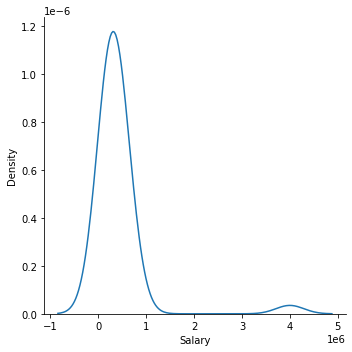

In [263]:
sns.displot(kind='kde',data = df_numerical[df_numerical['conscientiousness']<-2.8], x = 'Salary')

<AxesSubplot:xlabel='conscientiousness', ylabel='Count'>

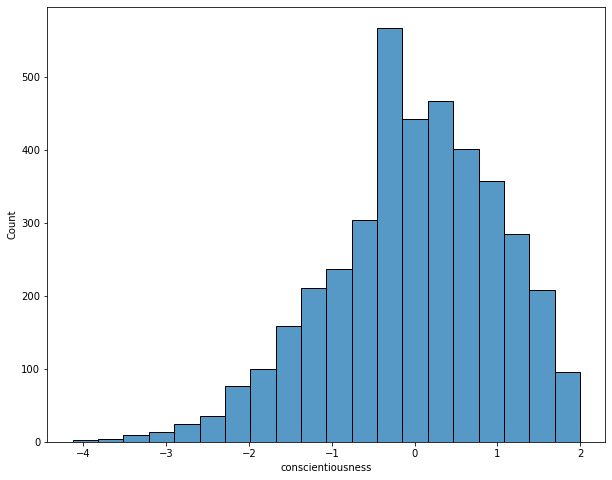

In [264]:
plt.figure(figsize = (10,8))
sns.histplot(data = df_numerical, x ='conscientiousness',bins = 20)

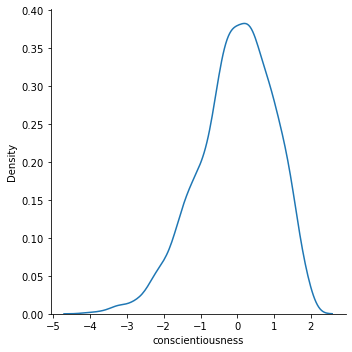

In [265]:
sns.displot(data = df_numerical, x ='conscientiousness', kind = 'kde')

<AxesSubplot:xlabel='agreeableness'>

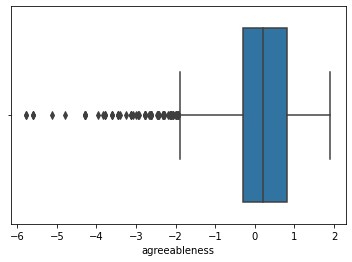

In [266]:
sns.boxplot(data = df_numerical, x="agreeableness")

In [267]:
df_numerical[df_numerical['agreeableness']<-2].describe().T

count           mean            std           min  \
Salary                 101.0  231683.168317  118243.979187  35000.000000   
10percentage           101.0      72.589505      10.584178     48.500000   
12percentage           101.0      70.386040      10.940847     43.420000   
collegeGPA             101.0      70.705743       7.718085     54.430000   
English                101.0     430.881188      99.477262    215.000000   
Logical                101.0     439.594059      98.826330    195.000000   
Quant                  101.0     467.277228     121.847291    195.000000   
Domain                  94.0       0.498353       0.270231      0.008155   
ComputerProgramming     81.0     399.185185     116.419619    125.000000   
ElectronicsAndSemicon   31.0     314.096774      82.689119    133.000000   
ComputerScience         16.0     374.375000      88.643011    223.000000   
MechanicalEngg           8.0     411.000000      48.222698    358.000000   
ElectricalEngg           6.0     415.333333     123.381792    286.000000   
TelecomEngg             10.0     305.000000      65.730088    206.000000   
CivilEngg                2.0     276.000000      22.627417    260.000000   
conscientiousness      101.0      -1.631147       1.078914     -3.893300   
agreeableness          101.0      -2.932726       0.936822     -5.781600   
extraversion           101.0      -1.511767       1.287161     -4.600900   
nueroticism            101.0       0.080608       0.803238     -2.136000   
openess_to_experience  101.0      -2.796334       1.910915     -7.375700   

                                 25%            50%            75%  \
Salary                 130000.000000  200000.000000  315000.000000   
10percentage               65.000000      73.000000      79.890000   
12percentage               63.000000      70.000000      78.000000   
collegeGPA                 65.660000      70.000000      75.000000   
English                   360.000000     425.000000     500.000000   
Logical                   365.000000     455.000000     505.000000   
Quant                     385.000000     475.000000     565.000000   
Domain                      0.276047       0.486747       0.694479   
ComputerProgramming       335.000000     395.000000     465.000000   
ElectronicsAndSemicon     266.000000     324.000000     366.000000   
ComputerScience           346.000000     376.000000     383.750000   
MechanicalEngg            373.500000     398.000000     452.750000   
ElectricalEngg            315.750000     398.500000     505.250000   
TelecomEngg               247.750000     313.000000     352.750000   
CivilEngg                 268.000000     276.000000     284.000000   
conscientiousness          -2.272000      -1.499200      -0.877200   
agreeableness              -3.399400      -2.619300      -2.285100   
extraversion               -2.295400      -1.359900      -0.758500   
nueroticism                -0.487900       0.019200       0.532300   
openess_to_experience      -3.735000      -2.585300      -1.435600   

                                 max  
Salary                 615000.000000  
10percentage               93.200000  
12percentage               98.700000  
collegeGPA                 91.000000  
English                   755.000000  
Logical                   665.000000  
Quant                     765.000000  
Domain                      0.998967  
ComputerProgramming       735.000000  
ElectronicsAndSemicon     500.000000  
ComputerScience           653.000000  
MechanicalEngg            473.000000  
ElectricalEngg            580.000000  
TelecomEngg               393.000000  
CivilEngg                 292.000000  
conscientiousness           0.664600  
agreeableness              -2.073300  
extraversion                1.107400  
nueroticism                 2.294930  
openess_to_experience       0.818300

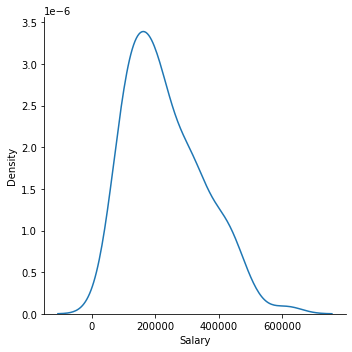

In [268]:
sns.displot(kind='kde',data = df_numerical[df_numerical['agreeableness']<-2], x = 'Salary')

<AxesSubplot:xlabel='agreeableness', ylabel='Count'>

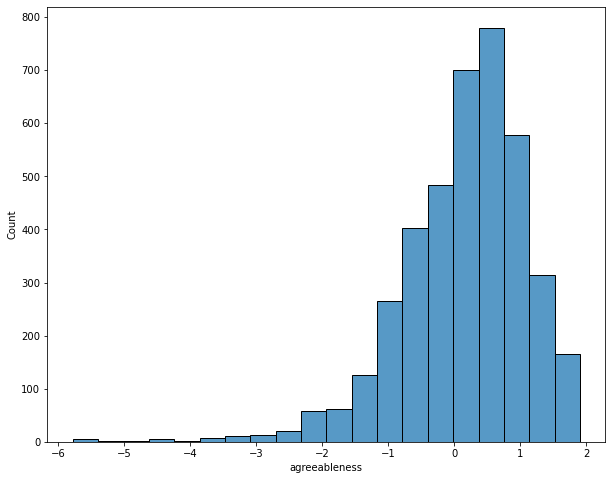

In [269]:
plt.figure(figsize = (10,8))
sns.histplot(data = df_numerical, x ='agreeableness',bins = 20)

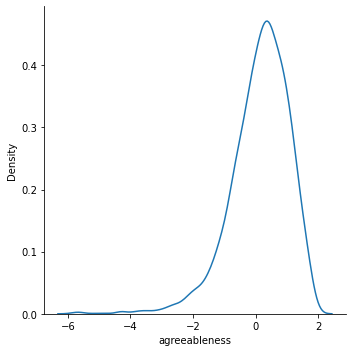

In [270]:
sns.displot(data = df_numerical, x ='agreeableness', kind = 'kde')

<AxesSubplot:xlabel='extraversion'>

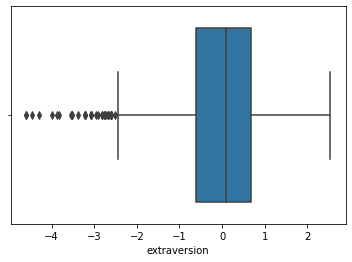

In [271]:
sns.boxplot(data = df_numerical, x="extraversion")

In [272]:
df_numerical[df_numerical['extraversion']<-2.4].describe().T

count           mean            std           min  \
Salary                  51.0  257745.098039  141408.322688  35000.000000   
10percentage            51.0      75.820588      10.776935     48.500000   
12percentage            51.0      74.235098      11.155248     52.000000   
collegeGPA              51.0      72.536471       7.584417     55.000000   
English                 51.0     482.941176     124.012808    180.000000   
Logical                 51.0     480.588235      82.496346    305.000000   
Quant                   51.0     486.176471     135.961716    195.000000   
Domain                  49.0       0.533878       0.278630      0.040999   
ComputerProgramming     39.0     411.153846      94.579829    125.000000   
ElectronicsAndSemicon   20.0     350.500000      83.963338    196.000000   
ComputerScience          8.0     322.500000      69.209826    223.000000   
MechanicalEngg           5.0     446.400000      96.240844    313.000000   
ElectricalEngg           4.0     362.250000      60.323434    313.000000   
TelecomEngg              9.0     353.888889      88.622013    206.000000   
CivilEngg                1.0     322.000000            NaN    322.000000   
conscientiousness       51.0      -1.703741       1.369342     -3.893300   
agreeableness           51.0      -2.164918       1.990608     -5.781600   
extraversion            51.0      -2.987127       0.599455     -4.600900   
nueroticism             51.0      -0.165032       1.010991     -2.136000   
openess_to_experience   51.0      -2.562247       2.587582     -7.375700   

                                 25%            50%            75%  \
Salary                 132500.000000  240000.000000  337500.000000   
10percentage               68.585000      77.000000      85.000000   
12percentage               64.000000      73.200000      83.300000   
collegeGPA                 67.370000      74.240000      77.850000   
English                   387.500000     485.000000     545.000000   
Logical                   422.500000     470.000000     532.500000   
Quant                     395.000000     485.000000     585.000000   
Domain                      0.338786       0.563268       0.783304   
ComputerProgramming       345.000000     425.000000     475.000000   
ElectronicsAndSemicon     292.000000     344.500000     400.000000   
ComputerScience           253.000000     346.000000     376.000000   
MechanicalEngg            420.000000     446.000000     473.000000   
ElectricalEngg            321.250000     345.000000     386.000000   
TelecomEngg               292.000000     366.000000     388.000000   
CivilEngg                 322.000000     322.000000     322.000000   
conscientiousness          -2.887900      -2.026200      -0.374500   
agreeableness              -3.783600      -1.952100      -0.522450   
extraversion               -3.217600      -2.756500      -2.602800   
nueroticism                -0.828935      -0.361200       0.407150   
openess_to_experience      -5.267900      -2.025300      -0.285900   

                                 max  
Salary                 650000.000000  
10percentage               93.000000  
12percentage               97.000000  
collegeGPA                 85.600000  
English                   765.000000  
Logical                   655.000000  
Quant                     855.000000  
Domain                      0.995266  
ComputerProgramming       575.000000  
ElectronicsAndSemicon     533.000000  
ComputerScience           407.000000  
MechanicalEngg            580.000000  
ElectricalEngg            446.000000  
TelecomEngg               473.000000  
CivilEngg                 322.000000  
conscientiousness           1.277200  
agreeableness               1.124800  
extraversion               -2.448500  
nueroticism                 2.294930  
openess_to_experience       1.055400

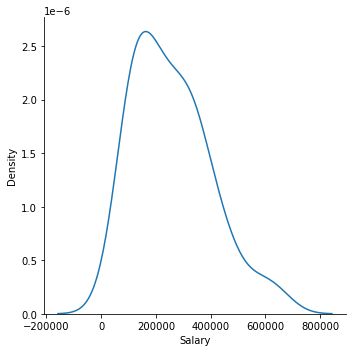

In [273]:
sns.displot(kind='kde',data = df_numerical[df_numerical['extraversion']<-2.4], x = 'Salary')

<AxesSubplot:xlabel='extraversion', ylabel='Count'>

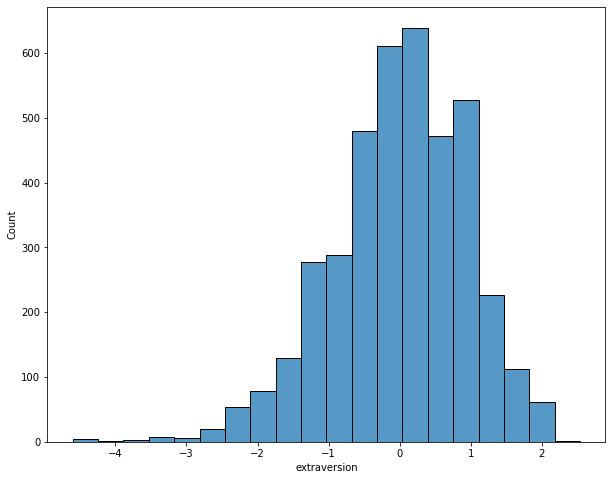

In [274]:
plt.figure(figsize = (10,8))
sns.histplot(data = df_numerical, x ='extraversion',bins = 20)

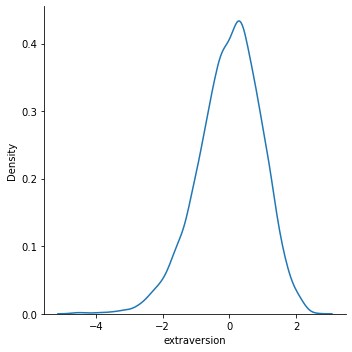

In [275]:
sns.displot(data = df_numerical, x ='extraversion', kind = 'kde')

<AxesSubplot:xlabel='nueroticism'>

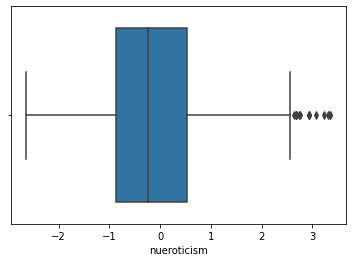

In [276]:
sns.boxplot(data = df_numerical, x="nueroticism")

In [277]:
df_numerical[df_numerical['nueroticism']>2.5].describe().T

count           mean            std            min  \
Salary                  19.0  233947.368421  133817.651088  100000.000000   
10percentage            19.0      75.727368       9.649622      54.000000   
12percentage            19.0      71.168947      12.010851      49.000000   
collegeGPA              19.0      69.171579       7.204858      57.000000   
English                 19.0     473.631579      79.505563     310.000000   
Logical                 19.0     474.736842      94.479182     300.000000   
Quant                   19.0     440.000000     130.181497     190.000000   
Domain                  17.0       0.480878       0.297744       0.018541   
ComputerProgramming     15.0     403.000000     114.530096     145.000000   
ElectronicsAndSemicon    5.0     311.600000      66.323450     260.000000   
ComputerScience          4.0     407.250000     168.577134     192.000000   
MechanicalEngg           4.0     327.750000      77.512902     260.000000   
ElectricalEngg           0.0            NaN            NaN            NaN   
TelecomEngg              2.0     398.500000     105.358910     324.000000   
CivilEngg                1.0     260.000000            NaN     260.000000   
conscientiousness       19.0      -0.035974       1.254357      -2.457000   
agreeableness           19.0       0.719800       0.932083      -1.452600   
extraversion            19.0       0.945305       1.233349      -1.988100   
nueroticism             19.0       2.852305       0.286011       2.530000   
openess_to_experience   19.0       0.491195       0.820859      -1.052400   

                                 25%            50%            75%  \
Salary                 130000.000000  180000.000000  317500.000000   
10percentage               71.040000      79.000000      81.100000   
12percentage               64.425000      68.000000      78.600000   
collegeGPA                 62.830000      68.300000      75.400000   
English                   445.000000     500.000000     512.500000   
Logical                   395.000000     465.000000     557.500000   
Quant                     347.500000     440.000000     507.500000   
Domain                      0.229482       0.413838       0.793581   
ComputerProgramming       360.000000     385.000000     480.000000   
ElectronicsAndSemicon     266.000000     266.000000     366.000000   
ComputerScience           330.000000     422.500000     499.750000   
MechanicalEngg            278.000000     308.000000     357.750000   
ElectricalEngg                   NaN            NaN            NaN   
TelecomEngg               361.250000     398.500000     435.750000   
CivilEngg                 260.000000     260.000000     260.000000   
conscientiousness          -0.995000       0.415500       0.981850   
agreeableness               0.378900       1.124800       1.280800   
extraversion                0.164000       1.393300       1.993100   
nueroticism                 2.664450       2.735600       2.998300   
openess_to_experience       0.084850       0.672100       1.190650   

                                 max  
Salary                 550000.000000  
10percentage               90.000000  
12percentage               95.000000  
collegeGPA                 81.600000  
English                   605.000000  
Logical                   620.000000  
Quant                     695.000000  
Domain                      0.991231  
ComputerProgramming       605.000000  
ElectronicsAndSemicon     400.000000  
ComputerScience           592.000000  
MechanicalEngg            435.000000  
ElectricalEngg                   NaN  
TelecomEngg               473.000000  
CivilEngg                 260.000000  
conscientiousness           1.901100  
agreeableness               1.904800  
extraversion                2.315400  
nueroticism                 3.352500  
openess_to_experience       1.630200

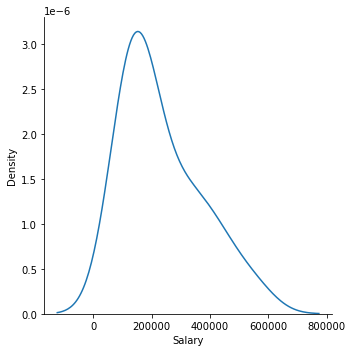

In [278]:
sns.displot(kind='kde',data = df_numerical[df_numerical['nueroticism']>2.5], x = 'Salary')

<AxesSubplot:xlabel='nueroticism', ylabel='Count'>

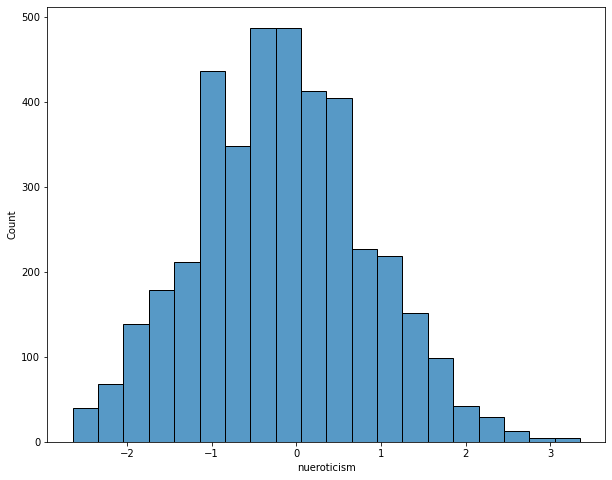

In [279]:
plt.figure(figsize = (10,8))
sns.histplot(data = df_numerical, x ='nueroticism',bins = 20)

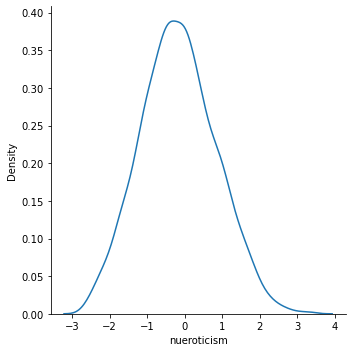

In [280]:
sns.displot(data = df_numerical, x ='nueroticism', kind = 'kde')

<AxesSubplot:xlabel='openess_to_experience'>

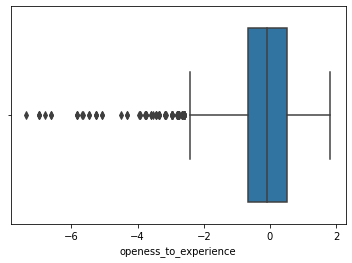

In [281]:
sns.boxplot(data = df_numerical, x="openess_to_experience")

In [282]:
df_numerical[df_numerical['openess_to_experience']<-2.5].describe().T

count           mean            std           min  \
Salary                  95.0  302263.157895  415763.056768  35000.000000   
10percentage            95.0      74.664316      10.021627     48.500000   
12percentage            95.0      72.756947      11.096487     43.420000   
collegeGPA              95.0      70.664737       7.458652     55.000000   
English                 95.0     452.684211     123.399995    180.000000   
Logical                 95.0     470.463158      88.518878    245.000000   
Quant                   95.0     480.210526     126.166716    195.000000   
Domain                  90.0       0.519734       0.273253      0.040999   
ComputerProgramming     72.0     421.083333     117.210386    105.000000   
ElectronicsAndSemicon   27.0     315.851852      75.564391    196.000000   
ComputerScience         19.0     377.947368      94.699216    223.000000   
MechanicalEngg           8.0     379.500000      61.780718    286.000000   
ElectricalEngg           6.0     392.500000      67.375812    313.000000   
TelecomEngg              8.0     323.125000      81.058070    206.000000   
CivilEngg                4.0     362.500000      49.675614    320.000000   
conscientiousness       95.0      -1.565942       1.120489     -3.893300   
agreeableness           95.0      -2.279475       1.479193     -5.781600   
extraversion            95.0      -1.580412       1.256852     -4.600900   
nueroticism             95.0      -0.151078       0.845758     -2.136000   
openess_to_experience   95.0      -3.635602       1.311980     -7.375700   

                                 25%           50%            75%  \
Salary                 150000.000000  240000.00000  325000.000000   
10percentage               68.585000      75.00000      83.000000   
12percentage               65.000000      73.00000      79.900000   
collegeGPA                 65.000000      70.56000      75.285000   
English                   362.500000     430.00000     535.000000   
Logical                   412.500000     470.00000     525.000000   
Quant                     420.000000     475.00000     562.500000   
Domain                      0.336835       0.50828       0.755979   
ComputerProgramming       355.000000     425.00000     517.500000   
ElectronicsAndSemicon     249.500000     333.00000     366.000000   
ComputerScience           346.000000     376.00000     391.500000   
MechanicalEngg            352.750000     379.50000     406.250000   
ElectricalEngg            334.500000     399.50000     442.750000   
TelecomEngg               277.250000     313.00000     396.000000   
CivilEngg                 321.500000     355.00000     396.000000   
conscientiousness          -2.272000      -1.45170      -0.877200   
agreeableness              -3.102500      -2.11860      -1.286100   
extraversion               -2.371950      -1.52700      -0.758500   
nueroticism                -0.642800      -0.23440       0.272700   
openess_to_experience      -3.926600      -2.97310      -2.759500   

                                max  
Salary                 4.000000e+06  
10percentage           9.250000e+01  
12percentage           9.580000e+01  
collegeGPA             9.100000e+01  
English                7.550000e+02  
Logical                6.450000e+02  
Quant                  8.100000e+02  
Domain                 9.988761e-01  
ComputerProgramming    6.350000e+02  
ElectronicsAndSemicon  4.520000e+02  
ComputerScience        6.530000e+02  
MechanicalEngg         4.730000e+02  
ElectricalEngg         4.730000e+02  
TelecomEngg            4.200000e+02  
CivilEngg              4.200000e+02  
conscientiousness      9.900000e-01  
agreeableness          1.044900e+00  
extraversion           1.393300e+00  
nueroticism            2.294930e+00  
openess_to_experience -2.585300e+00

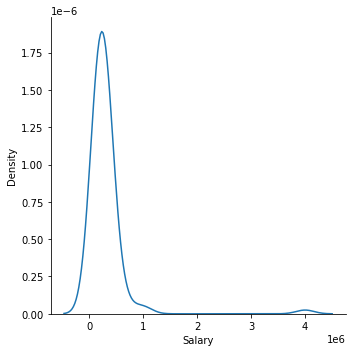

In [283]:
sns.displot(kind='kde',data = df_numerical[df_numerical['openess_to_experience']<-2.5], x = 'Salary')

<AxesSubplot:xlabel='openess_to_experience', ylabel='Count'>

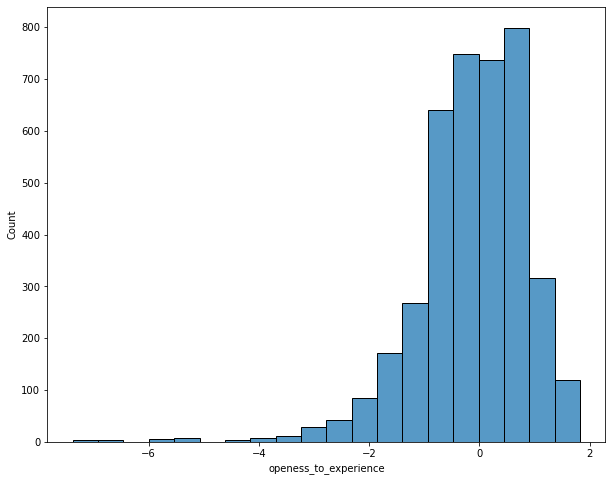

In [284]:
plt.figure(figsize = (10,8))
sns.histplot(data = df_numerical, x ='openess_to_experience',bins = 20)

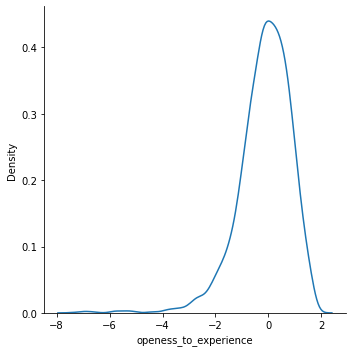

In [285]:
sns.displot(data = df_numerical, x ='openess_to_experience', kind = 'kde')

In [286]:
df = df.drop(["Unnamed: 0","ID"],axis = 1)

In [287]:
df.Designation = df.Designation.apply(lambda x: x.lower())
df.Designation

0           senior quality engineer
1                 assistant manager
2                  systems engineer
3          senior software engineer
4                               get
                   ...             
3993              software engineer
3994               technical writer
3995    associate software engineer
3996             software developer
3997        senior systems engineer
Name: Designation, Length: 3998, dtype: object

In [288]:
df.Designation = df.Designation.apply(lambda x: "Software Developer" if "developer" in x else "Quality Engineer" if 'quality'
                                     in x else "Recruiter" if 'recruit' in x else "Recruiter" if 'human' in x else "Tester" 
                                     if 'test' in x else "Scientist" if 'research' in x else "Core Job" if 'electrical' in x 
                                     else "Core Job" if 'mechanical' in x else "Core Job" if 'operation' in x else "Data Job"
                                     if 'db' in x else "Recruiter" if 'hr' in x else "Software Developer" if 'it' in x else 
                                    "Core Job" if 'supply' in x else "Core Job" if 'environ' in x else "Trainee" if 'train' in
                                     x else "Manager" if 'manage' in x else "Analyst" if 'analy' in x else "Quality Engineer"
                                     if 'qa' in x else "Design Engineer" if 'draft' in x else "Support" if 'support' in x else 
                                     "Design Engineer" if 'design' in x else "Core Job" if 'tele' in x else "Support" if 'cler'
                                     in x else "Design Engineer" if 'cad' in x else "Analyst" if 'risk' in x else "Core Job"
                                     if 'process' in x else "Software Developer" if "software" in x else "System Engineer" if
                                     "system engineer" in x else "System Engineer" if "systems engineer" in x else "Support" if
                                     "assistant" in x else "Core Job" if 'prof' in x else "Core Job" if 'hws' in x else 
                                     "Data Job" if 'data' in x else "Manager" if 'market' in x else "Core Job" if 'cnc' in x
                                     else "Core Job" if 'faculty' in x else "Maager" if 'control' in x else 'Software Developer'
                                     if 'programmer' in x else "Software Developer" if 'cloud' in x else "Manager" if 'secretary'
                                     in x else "Manager" if 'Maager' in x else "Core Job" if 'logistic' in x else 
                                     "Support" if 'care' in x else 'Core Job' if 'sap' in x else "Core Job" if 'aircraft' in x
                                     else "Core Job" if "embedded" in x else "Manager" if 'project' in x else "Trainee" if 'intern'
                                     in x else "Support" if 'admin' in x else "Data Job" if 'document' in x else 
                                     "Support" if 'servi' in x else "Support" if 'implement' in x else "Support" if 'sale' in x else
                                     "Analyst" if 'improve' in x else "Support" if 'execu' in x else "Support" if "consult" in x else
                                     "Analyst" if 'loss' in x else "System Engineer" if 'information' in x else "Support" if 'bank'
                                     in x else "Support" if "help" in x else "Scientist" if "r&d" in x else "Scientist" if "r & d"
                                      in x else "Software Developer" if "firmware" in  x else "System Engineer" if "hardware" in x 
                                     else "Core Job" if 'civi' in x else "Support" if 'network' in x else 'Core Job' if "technician"
                                     in x else "Core Job" if 'edu' in x else "Trainee" if 'apprentice' in x else "Design Engineer" 
                                     if "plan" in x else "Core Job" if 'engineer' in x else "Manager" if 'lead' in x else 
                                     'Core Job' if 'lecturer' in x else "Support" if 'get' in x else "Support" if 'associate'
                                     in x else "Core Job" if 'maint' in x else "Support" if 'coor' in x else 'Support' if 'seo'
                                     in x else 'Support' if 'ase' in x else x)
    

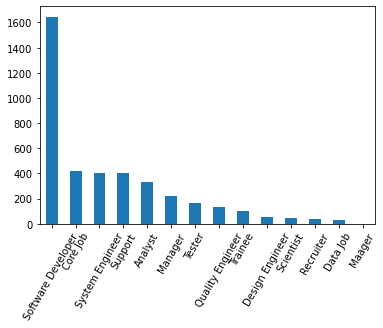

In [289]:
df.Designation.value_counts().plot(kind ='bar')
plt.xticks(rotation = 60);

In [290]:
df['JobCity'] = df['JobCity'].apply(lambda x : "Other" if x ==-1 else x)

In [291]:
df['JobCity'] = df['JobCity'].apply(lambda x : x.lower())
df['JobCity'] = df['JobCity'].apply(lambda x : x.strip())

In [292]:
df['JobCity'] = df['JobCity'].apply(lambda x : "pune" if "ratnagiri" in x else "vizag" if 'raigarh' in x else "vizag" if 'kula'
                                   in x else 'vizag' if 'khap' in x else "kolkata" if 'asan' in x else "kolkata" if 'sili'in x
                                   else "delhi" if 'new' in x else 'other' if x=='am' else "bhopal" if 'singaruli' in x else
                                   "bangalore" if 'bangl' in x else "noida" if 'gorak' in x else "bihar" if 'muzaf' in x else 
                                   'kolkata' if 'bankura' in x else "bihar" if 'bhagal' in x else 'noida' if 'sahib' in x else
                                    'bangalore' if 'bell' in x else 'noida' if 'ghaz' in x else'kolkata' if 'jaipur' in x else
                                   'ahmedabad' if 'surat' in x else 'noida' if 'noida' in x else 'himachal' if 'dhar' in x
                                   else 'other' if 'aust' in  x else 'other' if 'india' in x else 'bhubaneswar' if 'orissa' in x 
                                   else 'bhubaneswar' if 'ganjam' in x else 'hyderabad' if 'kurn' in x else 'mumbai' if 'navi' in x
                                   else 'bhubaneswar' if 'bhub' in x else 'hyderabad' if 'hyder' in x else "delhi" if 'gurgaon' in x
                                   else "mumbai" if 'thane' in x else 'kerala' if 'kochi' in x else 'kerala' if 'trivandrum' in x
                                   else 'kerala' if 'thiruvananthapuram' in x else 'other' if 'pondi' in x else 'bihar' if 'patna' in x
                                   else 'pune' if 'pune' in x else 'rajastan' if 'jabal' in x else 'rajastan' if 'stan' in x 
                                   else 'rajastan' if 'jodh' in x else 'other' if 'trichy' in x else 'other' if 'raipur' in x 
                                   else "bangalore" if 'bengalu' in x else 'other' if 'kanpur' in x else 'chennai' if 'chenn' in 
                                   x else 'other' if 'nagpur' in x else 'other' if 'meerut' in x else 'other' if 'nasik' in x else
                                   'mumbai' if 'mumbai' in x else 'delhi' if 'gurgo' in x else 'rajastan' if 'udai' in x else 
                                   'other' if 'ranchi' in x else 'bangalore' if 'bangalore' in x else 'other' if 'gandhi' in x 
                                   else 'rajastan' if 'patia' in x else 'hyderabad' if 'miryala' in x else 'rajastan' if 'bikan' in
                                   x else 'other' if 'swed' in x else 'other' if 'gulb' in x else 'mumbai' if 'maha' in x else 
                                   'other' if 'hospe' in x else 'other' if 'bundi' in x else 'other' if 'amb' in x else 'other' if
                                   'guwa' in x else 'other' if 'una' in x else 'other' if 'punr' in x else 'other' if 'rew' in x 
                                   else 'other' if 'daus' in x else 'other' if 'burd' in x else 'noida' if 'nou' in x else 
                                   'rajastan' if 'bhati' in x else 'other' if 'chey' in x else 'noida' if 'habad' in x else 
                                   "ahmedabad" if 'ahmed' in x else 'rajastan' if 'bath' in x else 'delhi' if 'gura' in x else 
                                   'other' if 'pond' in x else 'up' if 'bare' in x else 'other' if 'roor' in x else 'bangalore'
                                   if 'alore' in x else 'chennai' if 'tamil' in x else 'kerala' if 'calicut' in x else 
                                   'kolkata' if 'howrah' in x else 'other' if 'muz' in x else 'noida' if 'gaj' in x else 
                                   'vizag' if 'kaki' in x else 'other' if 'salem' in x else 'pune' if 'karad' in x else 
                                   'noida' if 'gaz' in x else 'kolkata' if 'khara' in x else 'other' if 'baddi' in x else
                                   'chandigarh' if 'harya' in x else 'rajastan' if 'rajas' in x else 'other' if 'phag' in x else 
                                    'chandigarh' if 'rohtak' in x else 'other' if 'gagr' in x else 'other' if 'main' in x else 
                                   'other' if 'durgarh' in x else 'other' if 'shahi' in x else 'other' if 'dam' in x else 'other' if
                                   'gonda' in x else 'other' if 'bhar' in x else 'other' if 'gonda' in x else 'other' if 'angul' in x
                                   else 'other' if 'samp' in x else 'kolkata' if 'kolka' in x else 'hyderabad' if 'derabad' in x 
                                   else 'other')

In [293]:
df['JobCity'].value_counts()

other          913
bangalore      698
noida          442
delhi          428
hyderabad      375
pune           329
chennai        316
kolkata        179
mumbai         163
bhubaneswar     42
kerala          35
ahmedabad       22
rajastan        21
vizag           16
bihar           10
himachal         4
up               2
chandigarh       2
bhopal           1
Name: JobCity, dtype: int64

In [294]:
df['DOL'] = df['DOL'].apply(lambda x: np.nan if x =='present' else x)

In [295]:
df['ComputerScience'] = df['ComputerScience'].apply(lambda x: np.nan if x==-1 else x)

In [296]:
df['MechanicalEngg'] = df['MechanicalEngg'].apply(lambda x: np.nan if x==-1 else x)
df['ElectricalEngg'] = df['ElectricalEngg'].apply(lambda x: np.nan if x==-1 else x)
df['TelecomEngg'] = df['TelecomEngg'].apply(lambda x: np.nan if x==-1 else x)
df['CivilEngg'] = df['CivilEngg'].apply(lambda x: np.nan if x==-1 else x)
df['ComputerProgramming'] = df['ComputerProgramming'].apply(lambda x: np.nan if x==-1 else x)
df['ElectronicsAndSemicon'] = df['ElectronicsAndSemicon'].apply(lambda x: np.nan if x==-1 else x)



In [297]:
df.CollegeState = df.CollegeState.apply(lambda x:x.title())

<b>year of passing student distribution</b>



In [298]:
df_dummy = df[df['GraduationYear']!=0]

<AxesSubplot:>

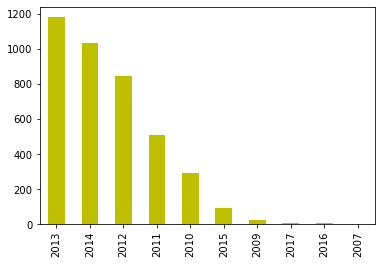

In [299]:
df_dummy.GraduationYear.value_counts().plot(kind ='bar',color ='y')

#Majority of the AMCAT applicatnts are 2014 to 2012 and 2013 graduates are the hightest number of applicants.
#There are hardly any applicants from below 2010 graduates.

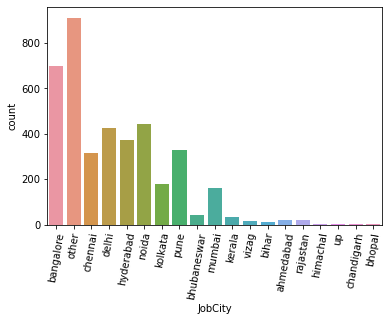

In [300]:
sns.countplot(data =df, x ='JobCity')
plt.xticks(rotation = 80);
#majority of the applicatns are posted in cities like banglore, noida, hyderabad, pune, mumbai and chennai.. 
#candidates who are posted in small towns of the country are kept under the category of otehrs... the data shows that there are
#great opportunites in small towns of the country also..
#among the capital cities. ahamadabad and bhubaneswar seems to have comparitively lesser job opportunities.

<AxesSubplot:ylabel='Degree'>

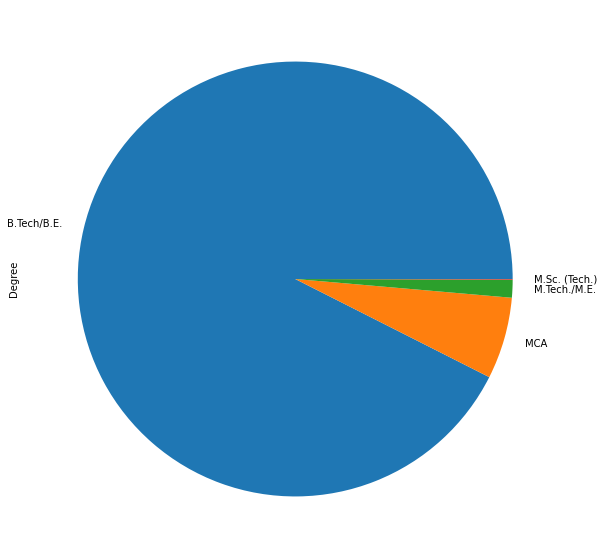

In [301]:
plt.figure(figsize=(10,10))
df['Degree'].value_counts().plot(kind = 'pie')

#among the applicants B.Tech/BE graduates are more in number and the next place is for MCA and there are a very few M.Tech 
#graduates are applying for jobs through AMCAT

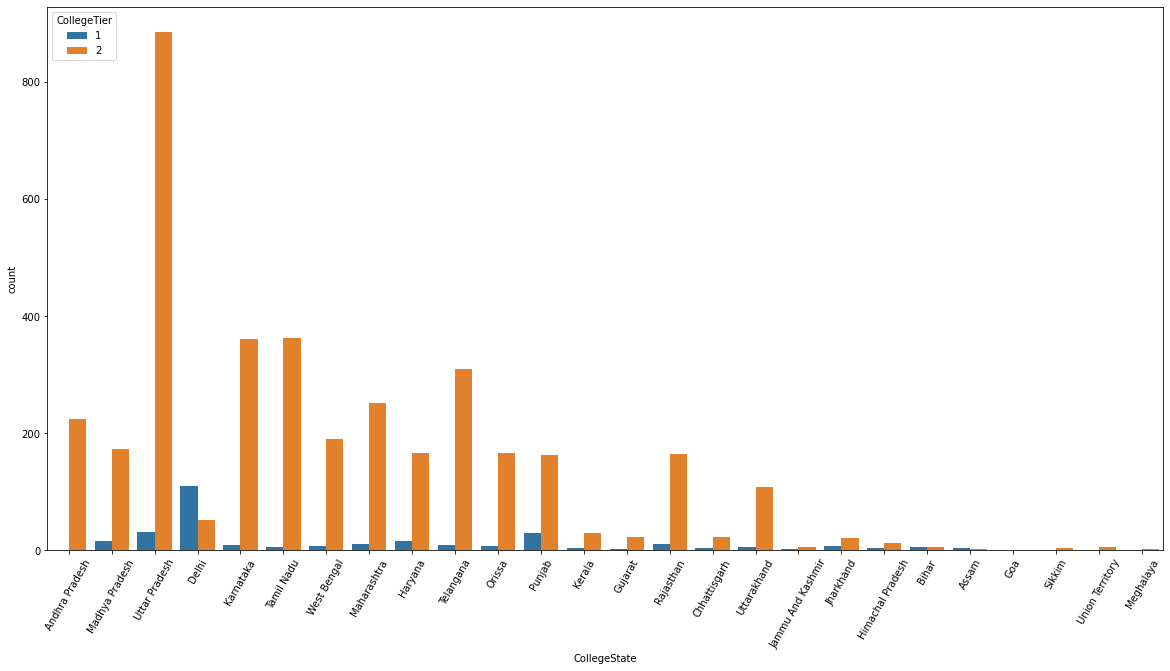

In [302]:
plt.figure(figsize = (20,10))
sns.countplot(x = df['CollegeState'], hue = df['CollegeTier'])
plt.xticks(rotation = 60);

#Highest number of applicants are from Uttarpradesh state
#There are a very few tier-1 college students are applying for jobs through AMCAT hence, there could be most of the tier-1 college
#graduates are getting placed through college placements and also in reality there are a very few number of tier-1 colleges
#There are no applicants from tier-1 colleges of Andhrapradesh State, Goa, Sikkim, Meghalaya, and Union Territories.

# Bi Variate Analysis

In [303]:
df.Specialization = df.Specialization.apply(lambda x:x.title())

In [304]:
df.Specialization.value_counts()

Electronics And Communication Engineering      880
Computer Science & Engineering                 744
Information Technology                         660
Computer Engineering                           600
Computer Application                           244
Mechanical Engineering                         201
Electronics And Electrical Engineering         196
Electronics & Telecommunications               121
Electrical Engineering                          82
Electronics & Instrumentation Eng               32
Civil Engineering                               29
Information Science Engineering                 27
Electronics And Instrumentation Engineering     27
Instrumentation And Control Engineering         20
Electronics Engineering                         19
Biotechnology                                   15
Other                                           13
Industrial & Production Engineering             10
Chemical Engineering                             9
Applied Electronics And Instrum

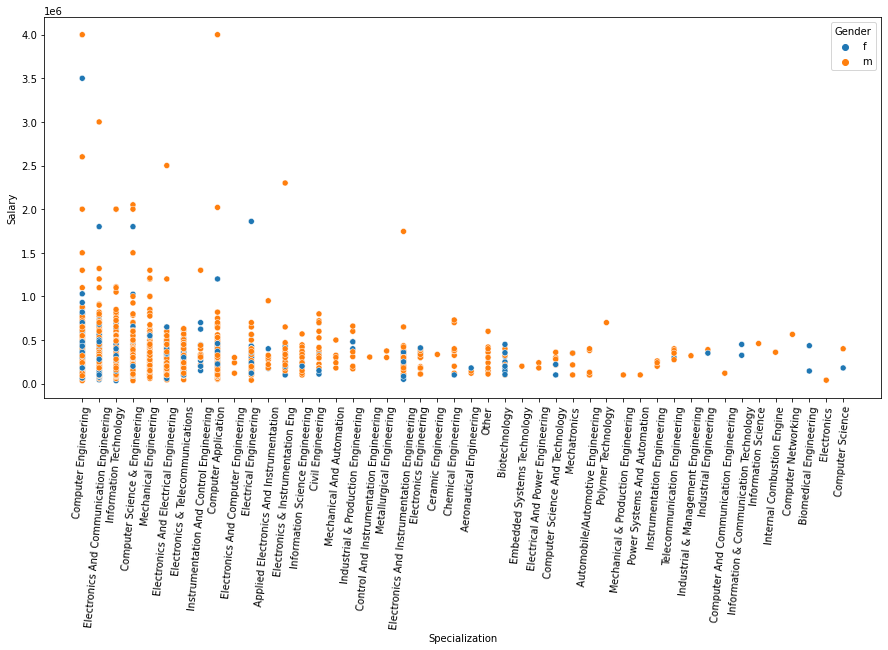

In [305]:
plt.figure(figsize = (15,7))
sns.scatterplot(data = df, x = 'Specialization', y = 'Salary', hue = 'Gender')
plt.xticks(rotation = 85);
#The highest salary(i.e. 40lpa) being paid to the computer science and computer application engineering graduats..and both are Male candidates
#There is one female candidate from Computer science backgroud with 35 lpa package.
#

In [306]:
df.collegeGPA = df.collegeGPA.apply(lambda x: x*10 if x <=10 else x)

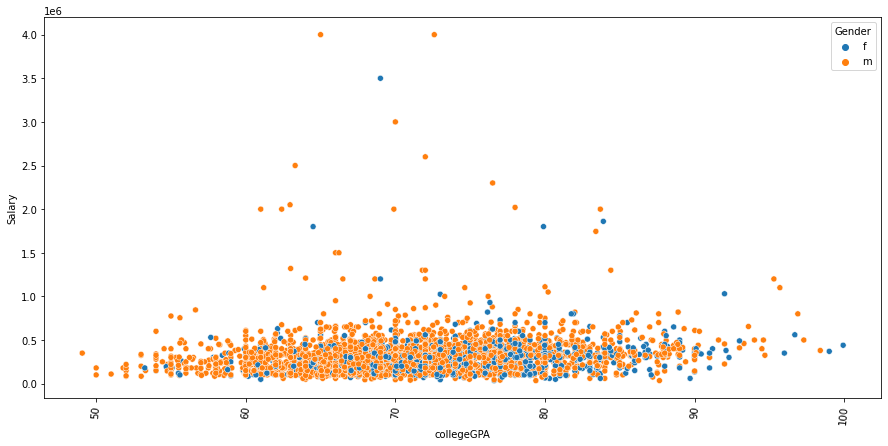

In [307]:
plt.figure(figsize = (15,7))
sns.scatterplot(data = df, x = 'collegeGPA', y = 'Salary', hue = 'Gender')
plt.xticks(rotation = 85);

<b>1. Most of the candidates got the jobs around 3-6 lakhs/anum.<br>
2. Candidates with highest salary being offered socred only between 65 and 75 percent range for both male and female.<br>
3. Female candidates tend to have higher CGPAs but the according to statistics average salary of male is bit higher compared to female candidates
</b>

In [308]:
df.groupby(by='Gender').describe().T

Gender                                   f              m
Salary                count     957.000000    3041.000000
                      mean   294937.304075  311716.211772
                      std    191031.789503  218999.537438
                      min     35000.000000   35000.000000
                      25%    200000.000000  180000.000000
...                                    ...            ...
openess_to_experience min        -6.609200      -7.375700
                      25%        -0.445500      -0.669200
                      50%         0.097300      -0.094300
                      75%         0.672100       0.480500
                      max         1.822400       1.630200

[208 rows x 2 columns]

C:\Users\kisho\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


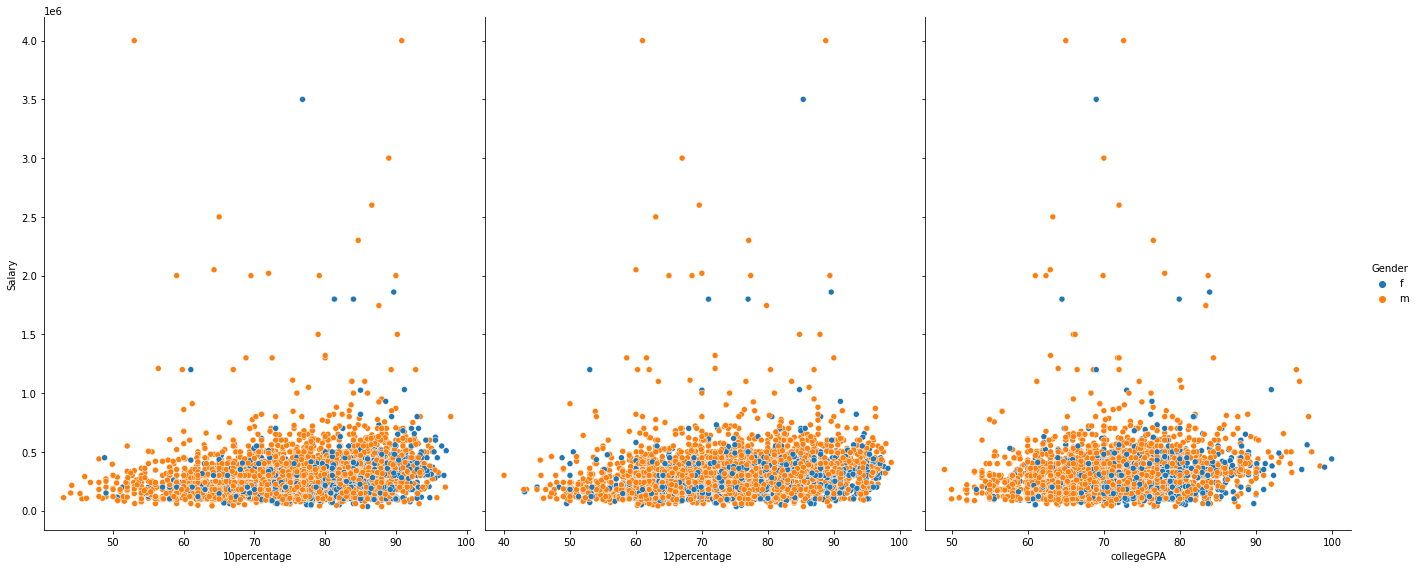

In [309]:
 plt.rcParams['figure.figsize']=15,15
sns.pairplot(df, x_vars = ['10percentage',"12percentage","collegeGPA"], y_vars = ["Salary"], hue = "Gender",
             size = 8,aspect = 0.8);
plt.show()

In [310]:
#Onc candidate with highest salary has scored above 90% in 10th, 12th but graduation scores are in the range of 60 to 75%
#Another candidate with hihgest salary has scored nearly has approximately 50 to 65% scores only.
#Majority of the candidates soores are around 70 to 90% for both 10th and 12th wehre as in graudation it is around 60 to 80%

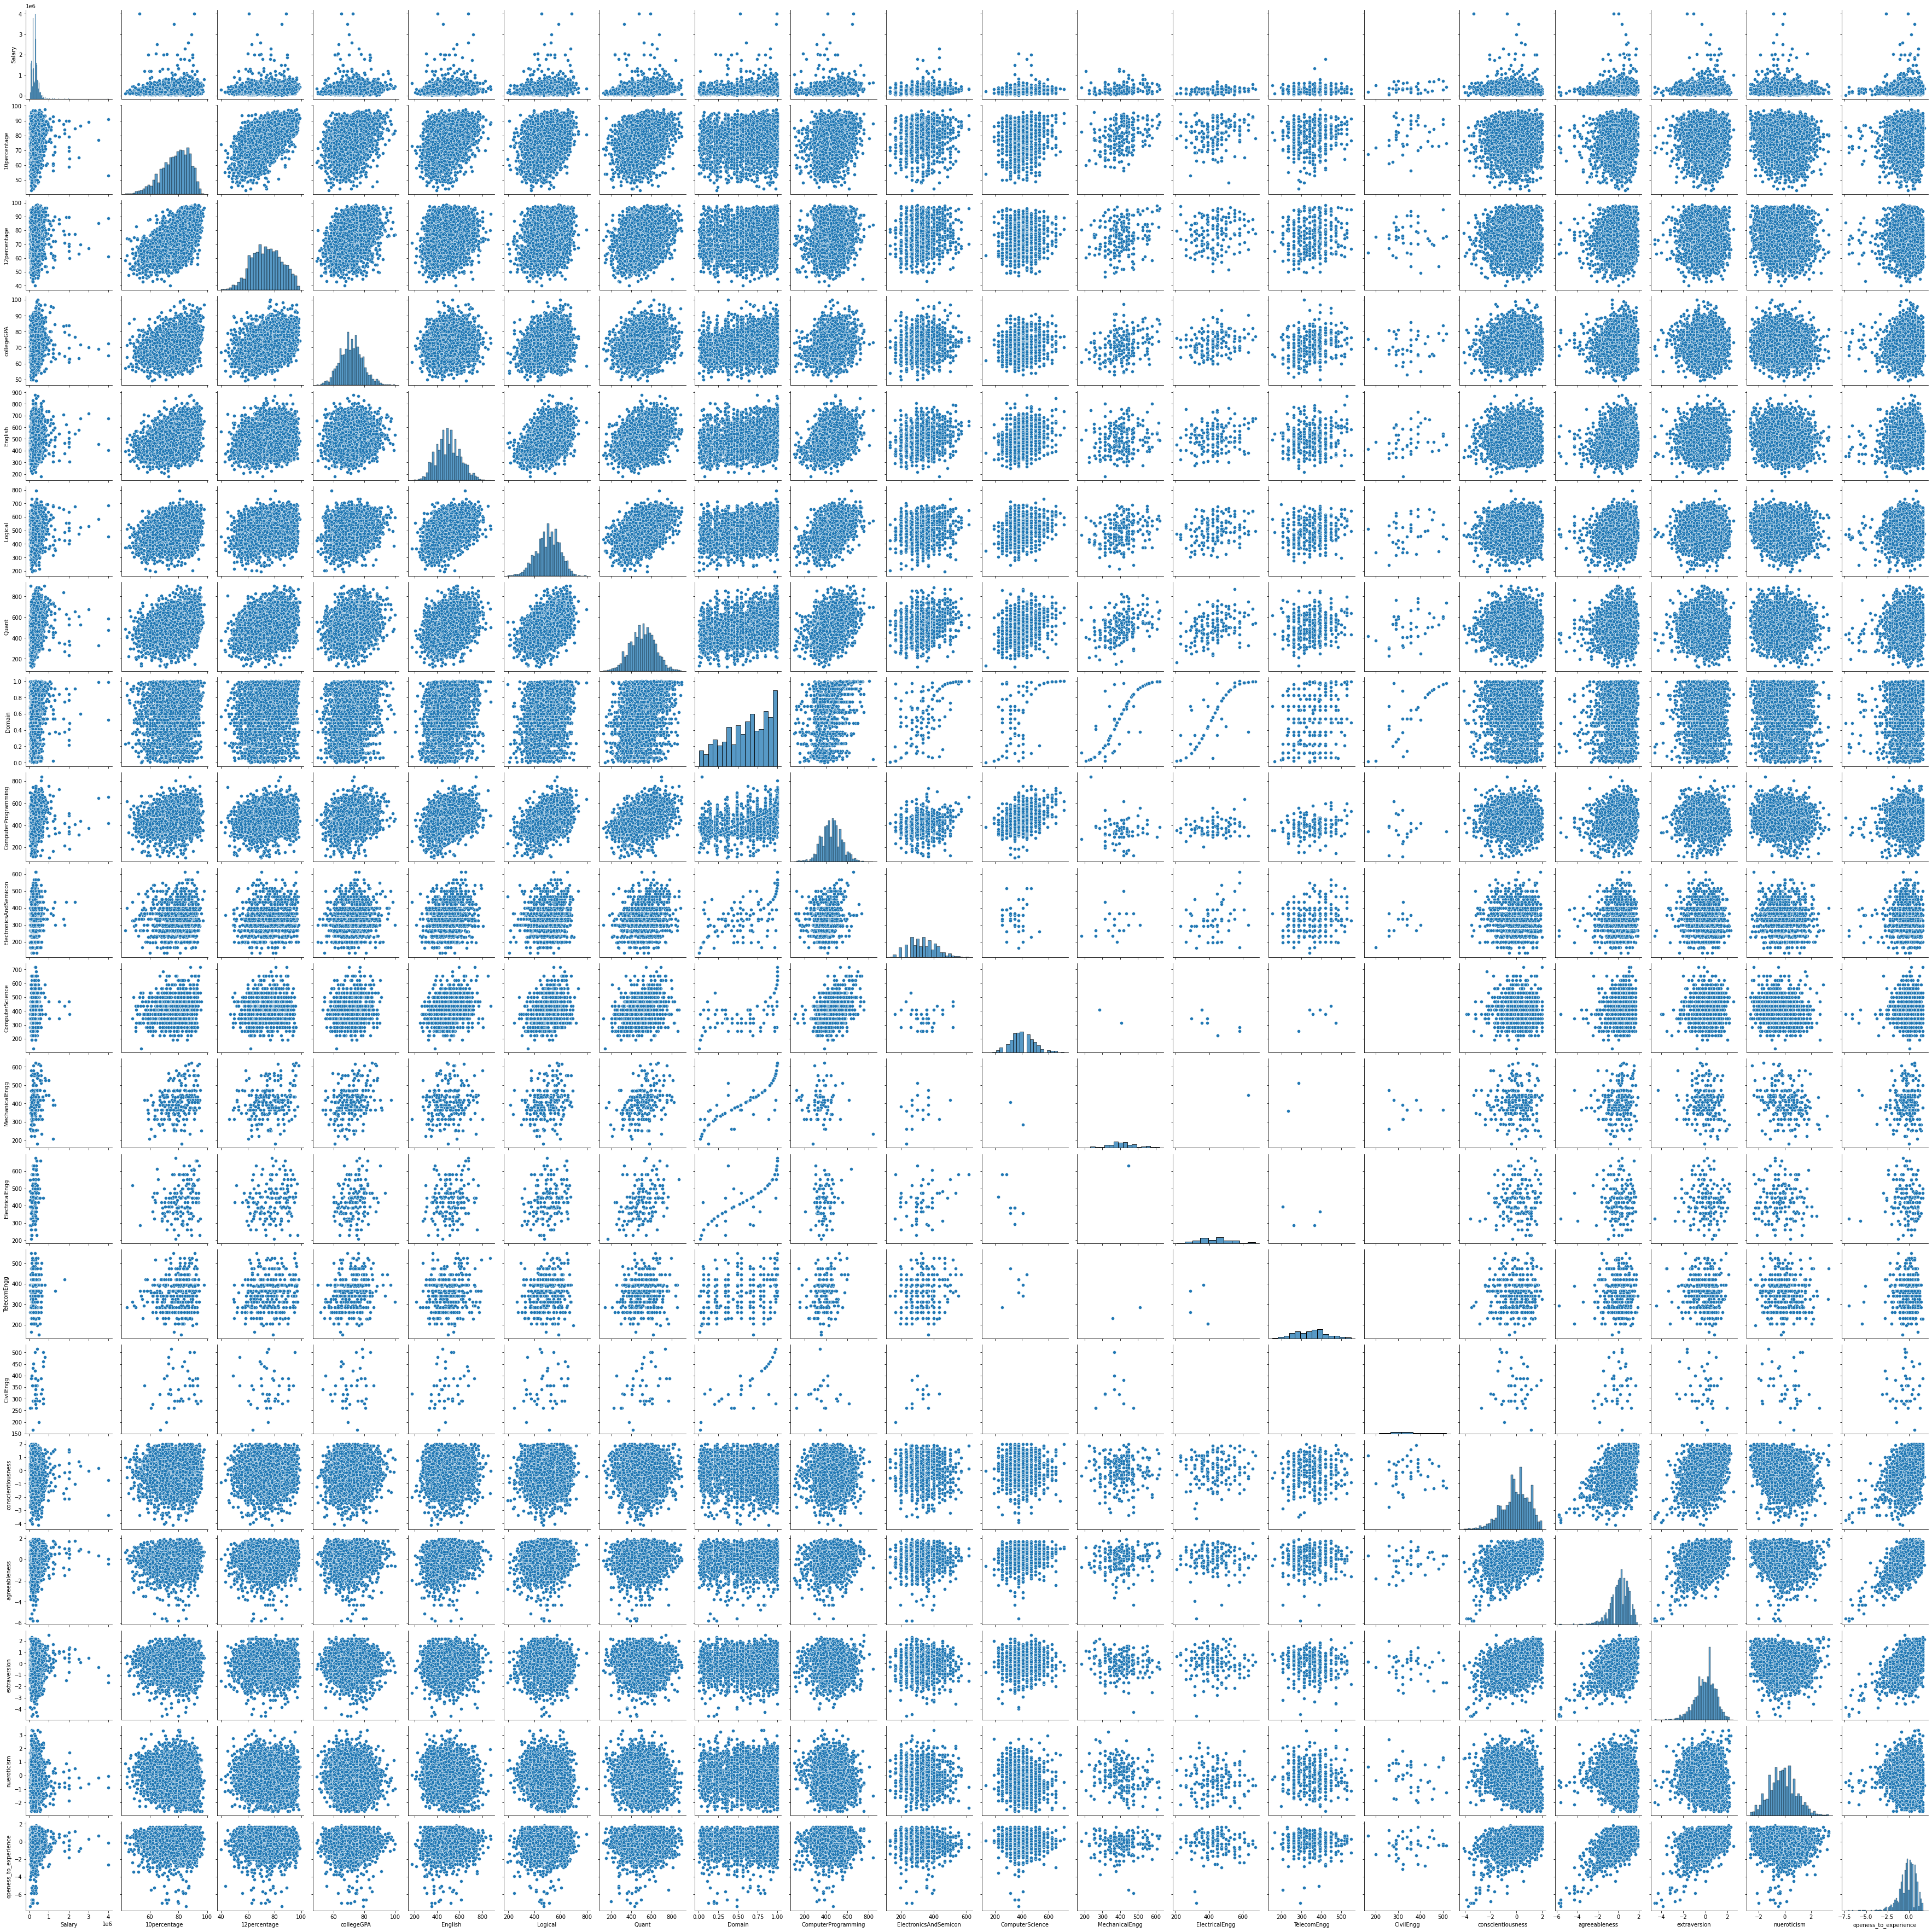

In [311]:
sns.pairplot(df_numerical)

C:\Users\kisho\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 39.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Degree', ylabel='collegeGPA'>

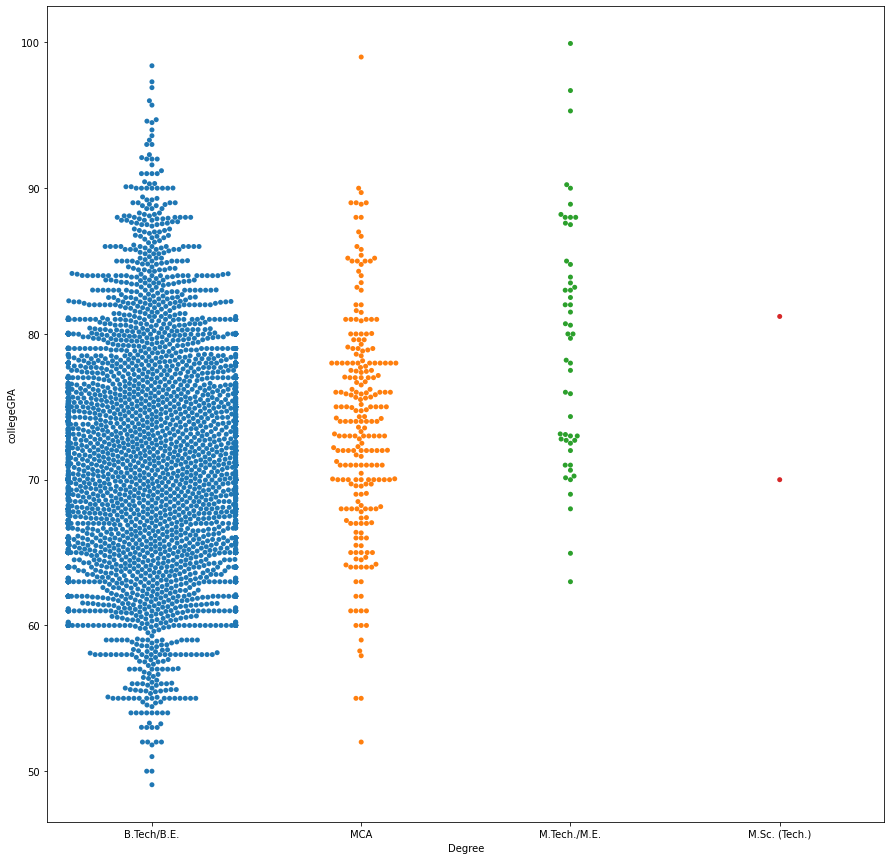

In [312]:
sns.swarmplot(data = df, x='Degree', y='collegeGPA')

<AxesSubplot:xlabel='Degree', ylabel='Salary'>

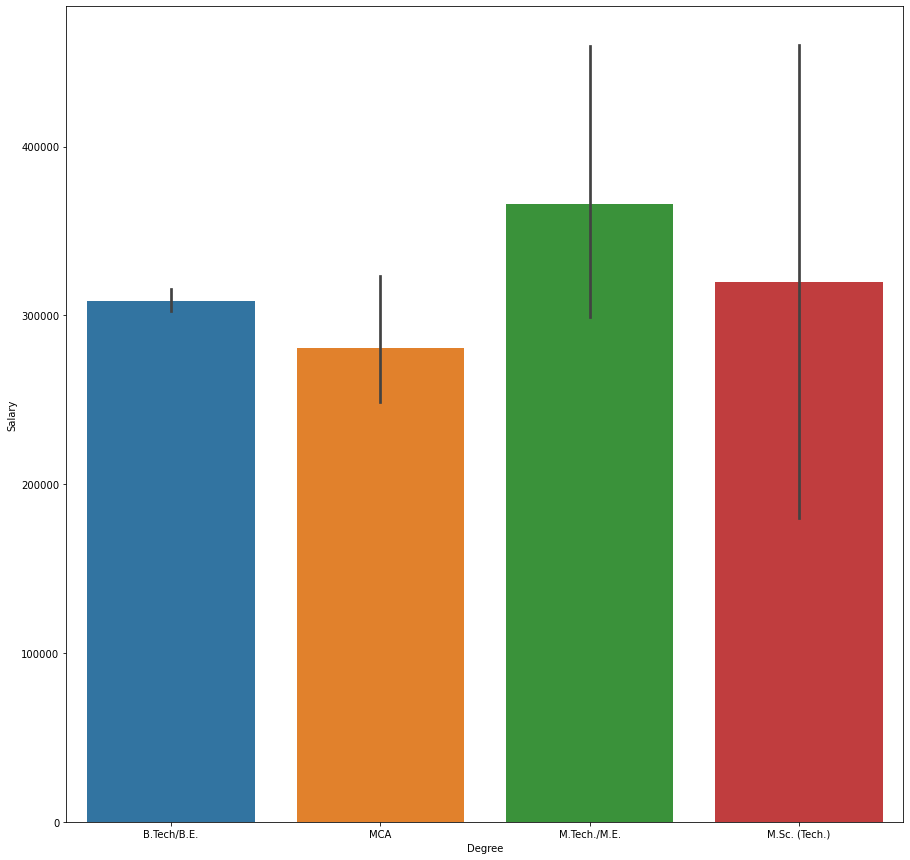

In [313]:
sns.barplot(x = "Degree", y = "Salary",  data=df)

# Research Question

<b>
Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.
</b>

In [330]:
df_dummy['Designation'].value_counts()[:40]

software engineer                539
software developer               265
system engineer                  205
programmer analyst               139
systems engineer                 118
java software engineer           111
software test engineer           100
project engineer                  77
technical support engineer        76
senior software engineer          72
java developer                    67
test engineer                     57
web developer                     54
application developer             52
assistant manager                 52
network engineer                  51
data analyst                      49
business analyst                  49
engineer                          47
associate software engineer       46
android developer                 46
programmer                        36
senior systems engineer           35
.net developer                    34
php developer                     33
production engineer               29
qa analyst                        29
d

In [327]:
df_software = df_dummy[df_dummy['Designation']=="software engineer"]

In [328]:
df_analyst = df_dummy[df_dummy['Designation']=='programmer analyst']

In [332]:
df_hardware = df_dummy[df_dummy['Designation']=='hardware engineer']

In [333]:
df_associate = df_dummy[df_dummy['Designation']== 'associate engineer']

In [334]:
df_research = pd.concat

TypeError: cannot add DatetimeArray and DatetimeArray